# Итоговая работа по Языкам программирования

## Постановка задачи

**Бизнес-задача от кинокомпании "StarVision Films"**

**Название проекта:**
Разработка прогнозной модели окупаемости фильмов на основе ключевых параметров.

**Цель:**
Создать модель, которая позволит предсказывать финансовую успешность кинопроектов на этапе планирования, чтобы минимизировать риски и оптимизировать инвестиции в производство фильмов.


## Описание данных
Данные взяты с датасета kaggle: [The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?resource=download&select=movies_metadata.csv)

In [57]:
import numpy as np
import pandas as pd

df_movies = pd.read_csv("dataset/movies_metadata.csv")
df_cast = pd.read_csv("dataset/credits.csv")

print(df_movies.columns)

print(df_cast)

C:\Users\user\AppData\Local\Temp\ipykernel_28324\3673338131.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies = pd.read_csv("dataset/movies_metadata.csv")


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
                                                    cast  \
0      [{'cast_id': 14, 'character': 'Woody (voice)',...   
1      [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2      [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3      [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4      [{'cast_id': 1, 'character': 'George Banks', '...   
...                                                  ...   
45471  [{'cast_id': 0, 'character': '', 'credit_id': ...   
45472  [{'cast_id': 1002, 'character': 'Sister Angela...   
45473  [{'cast_id': 6, 'character': 'Emily Shaw', 'cr... 

## Просмотр данных

In [2]:
df_cast['cast'].iloc[0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [3]:
df_cast['crew'].iloc[0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [4]:
df_movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [5]:
print("Пропуски в df_movies:")
print(df_movies.isna().sum())

Пропуски в df_movies:
adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


In [6]:
# Только количество уникальных значений
print("\nКоличество уникальных значений по колонкам:")
print(df_movies.nunique())

# Полная статистика (топ-5 частых значений для каждой колонки)
for column in df_movies.columns:
    print(f"\nКолонка: {column}")
    print(f"Уникальных значений: {df_movies[column].nunique()}")
    print("Топ-5 частых значений:")
    print(df_movies[column].value_counts().head())


Количество уникальных значений по колонкам:
adult                        5
belongs_to_collection     1698
budget                    1226
genres                    4069
homepage                  7673
id                       45436
imdb_id                  45417
original_language           92
original_title           43373
overview                 44307
popularity               44176
poster_path              45024
production_companies     22708
production_countries      2393
release_date             17336
revenue                   6863
runtime                    353
spoken_languages          1931
status                       6
tagline                  20283
title                    42277
video                        2
vote_average                92
vote_count                1820
dtype: int64

Колонка: adult
Уникальных значений: 5
Топ-5 частых значений:
adult
False                                                                                                                             

Удаляем ненужные и неинформативные столбцы

In [58]:
df_movies = df_movies[df_movies['status'] == 'Released']
df_movies = df_movies[df_movies['adult'] == 'False']
df_movies = df_movies.drop(columns=['video', 'tagline', 'status',
                                    'poster_path', 'overview', 'original_title',
                                    'spoken_languages', 'imdb_id', 'homepage', 
                                    'belongs_to_collection', 'adult', 'production_companies'])


### Проверка пропусков

In [8]:
print("Пропуски в df_movies:")
print(df_movies.isna().sum())

Пропуски в df_movies:
budget                    0
genres                    0
id                        0
original_language        10
popularity                0
production_countries      0
release_date             78
revenue                   0
runtime                 251
title                     0
vote_average              0
vote_count                0
dtype: int64


In [9]:
df_movies[['title', 'production_countries', 'revenue']][df_movies['release_date'].isna()].sort_values(by='revenue', ascending=False)

,title,production_countries,revenue
711,War Stories Our Mother Never Told Us,[],0.0
734,Vermont Is for Lovers,[],0.0
3628,Boricua's Bond,[],0.0
5879,Divine Intervention,[],0.0
13839,Bling: A Planet Rock,[],0.0
...,...,...,...
45148,Engineering Red,[],0.0
45203,All Superheroes Must Die 2: The Last Superhero,[],0.0
45338,The Land Where the Blues Began,[],0.0
45410,Aprel,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",0.0


In [10]:
df_movies[['title', 'production_countries', 'revenue']][df_movies['runtime'].isna()].sort_values(by='revenue', ascending=False).head(10)

,title,production_countries,revenue
25937,"Pancho, el perro millonario","[{'iso_3166_1': 'ES', 'name': 'Spain'}]",2483130.0
39496,La caliente niña Julietta,"[{'iso_3166_1': 'ES', 'name': 'Spain'}]",591696.0
35216,Nunca en horas de clase,"[{'iso_3166_1': 'ES', 'name': 'Spain'}]",495861.0
635,Happy Weekend,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",65335.0
43392,Королёв,[],31000.0
40378,Miesten välisiä keskusteluja,"[{'iso_3166_1': 'FI', 'name': 'Finland'}]",3.0
802,Diebinnen,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",0.0
13660,Człowiek z M-3,[],0.0
863,Baton Rouge,[],0.0
13562,Ystäväni Henry,[],0.0


In [11]:
df_movies[['title', 'production_countries', 'revenue']][df_movies['original_language'].isna()].sort_values(by='revenue', ascending=False).head(10)

,title,production_countries,revenue
19574,Shadowing the Third Man,"[{'iso_3166_1': 'AT', 'name': 'Austria'}, {'is...",0.0
21602,Unfinished Sky,"[{'iso_3166_1': 'AU', 'name': 'Australia'}]",0.0
22832,13 Fighting Men,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0
32141,Lambchops,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0
37407,Prince Bayaya,"[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'}]",0.0
41047,Song of Lahore,[],0.0
41872,Annabelle Serpentine Dance,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0
44057,Lettre d'une inconnue,"[{'iso_3166_1': 'FR', 'name': 'France'}]",0.0
44410,Yarn,[],0.0
44576,WiNWiN,"[{'iso_3166_1': 'AT', 'name': 'Austria'}]",0.0


**ВЫВОДЫ:** 
Как мы увидели все фильмы с пропусками, либо ничего не заработали, либо сняты не при помощи США. 

Поэтому можно удалить эти пропуски.

In [59]:
df_movies = df_movies.dropna(subset=['title', 'release_date', 'runtime', 'budget', 'original_language', 'revenue'])

### Оставляем только фильмы на английском языке и сделаные при помощи США

In [60]:
import ast
# Безопасное преобразование строки в список
def safe_eval(x):
    try:
        return ast.literal_eval(x) if pd.notna(x) else []
    except (ValueError, SyntaxError):
        return []

# Применяем функцию ко всей колонке
df_movies['production_countries'] = df_movies['production_countries'].apply(safe_eval)

In [61]:
df_movies = df_movies[df_movies['production_countries'].apply(
    lambda x: any(
        isinstance(country, dict) and country.get('iso_3166_1') == 'US'
        for country in x
    )
)]

In [62]:
# Оставляем только фильмы на английском языке
df_movies = df_movies[df_movies['original_language'] == 'en']

### Преобразование даты

In [63]:
# Преобразуем в datetime
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

# Создаем новые столбцы
df_movies['release_year'] = df_movies['release_date'].dt.year
df_movies['release_week'] = df_movies['release_date'].dt.isocalendar().week

In [64]:
df_movies['vote_count'] = df_movies['vote_count'].astype('int64')
df_movies['budget'] = df_movies['budget'].astype('int64')
df_movies['revenue'] = df_movies['revenue'].astype('int64')
df_movies['popularity'] = df_movies['popularity'].astype('float64')

In [65]:
# Расчёт прибыли
df_movies['profit'] = df_movies['revenue'] - df_movies['budget']

In [66]:
# Фильтруем фильмы по бизнес-логике
df_movies = df_movies[
    (df_movies['release_year'] >= 2000) &
    (df_movies['budget'] > 0) &
    (df_movies['revenue'] > 0)
].copy()

In [20]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2605 entries, 3060 to 45167
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                2605 non-null   int64         
 1   genres                2605 non-null   object        
 2   id                    2605 non-null   object        
 3   original_language     2605 non-null   object        
 4   popularity            2605 non-null   float64       
 5   production_countries  2605 non-null   object        
 6   release_date          2605 non-null   datetime64[ns]
 7   revenue               2605 non-null   int64         
 8   runtime               2605 non-null   float64       
 9   title                 2605 non-null   object        
 10  vote_average          2605 non-null   float64       
 11  vote_count            2605 non-null   int64         
 12  release_year          2605 non-null   int32         
 13  release_week       

### Преобразование жанров

In [67]:
df_movies['genres'] = df_movies['genres'].apply(
    lambda x: [genre['name'] for genre in eval(x)] if pd.notna(x) else []
)
df_movies['genres'].head()

3060                                 [Comedy]
3073      [Horror, Science Fiction, Thriller]
3155                        [Horror, Mystery]
3158      [Action, Comedy, Romance, Thriller]
3167    [Drama, Adventure, Romance, Thriller]
Name: genres, dtype: object

In [22]:
# Проверка пустых списков в genres
df_movies['genres'].value_counts().head(15)

genres
[Comedy]                     188
[Drama]                      179
[Drama, Romance]              76
[Comedy, Romance]             74
[Comedy, Drama]               65
[Comedy, Drama, Romance]      64
[Horror, Thriller]            60
[Drama, Thriller]             42
[Horror]                      34
[Drama, Comedy]               26
[Crime, Drama, Thriller]      25
[Action, Thriller]            23
[Action, Crime, Thriller]     23
[Comedy, Family]              22
[Action, Comedy]              21
Name: count, dtype: int64

In [68]:
# Разбиваем списки на отдельные строки
exploded_genres = df_movies['genres'].explode()

# Считаем частоту
genre_counts = exploded_genres.value_counts()
print(genre_counts)

genres
Drama              1170
Comedy              938
Thriller            778
Action              698
Adventure           496
Romance             443
Crime               407
Family              312
Science Fiction     310
Horror              281
Fantasy             260
Mystery             220
Animation           169
Music                87
History              73
War                  68
Documentary          33
Western              28
Foreign               1
Name: count, dtype: int64


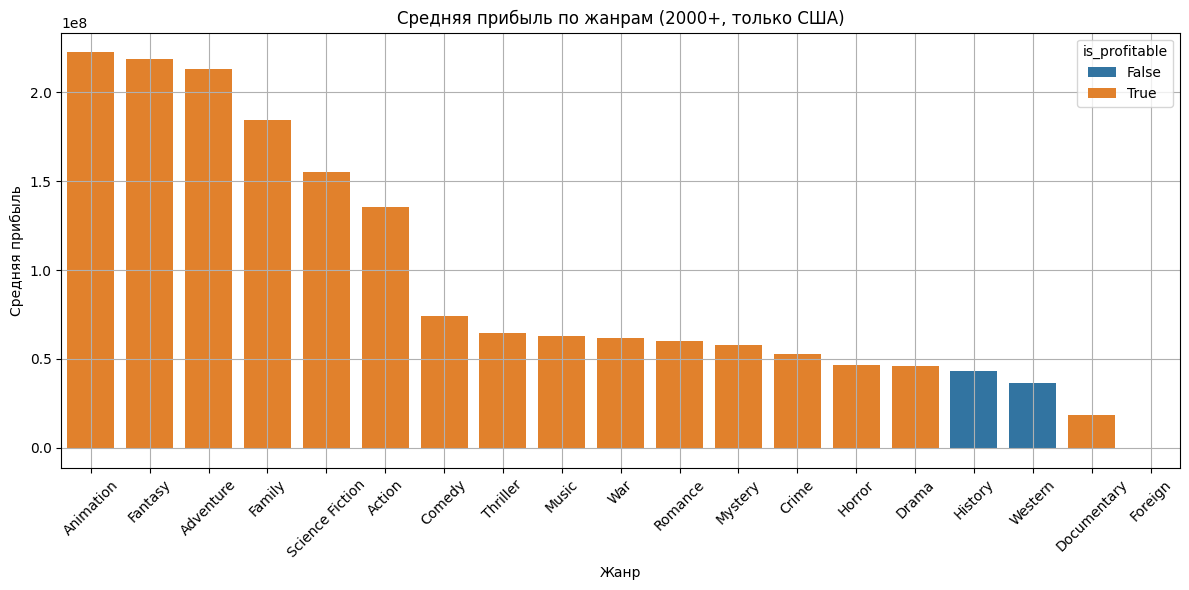

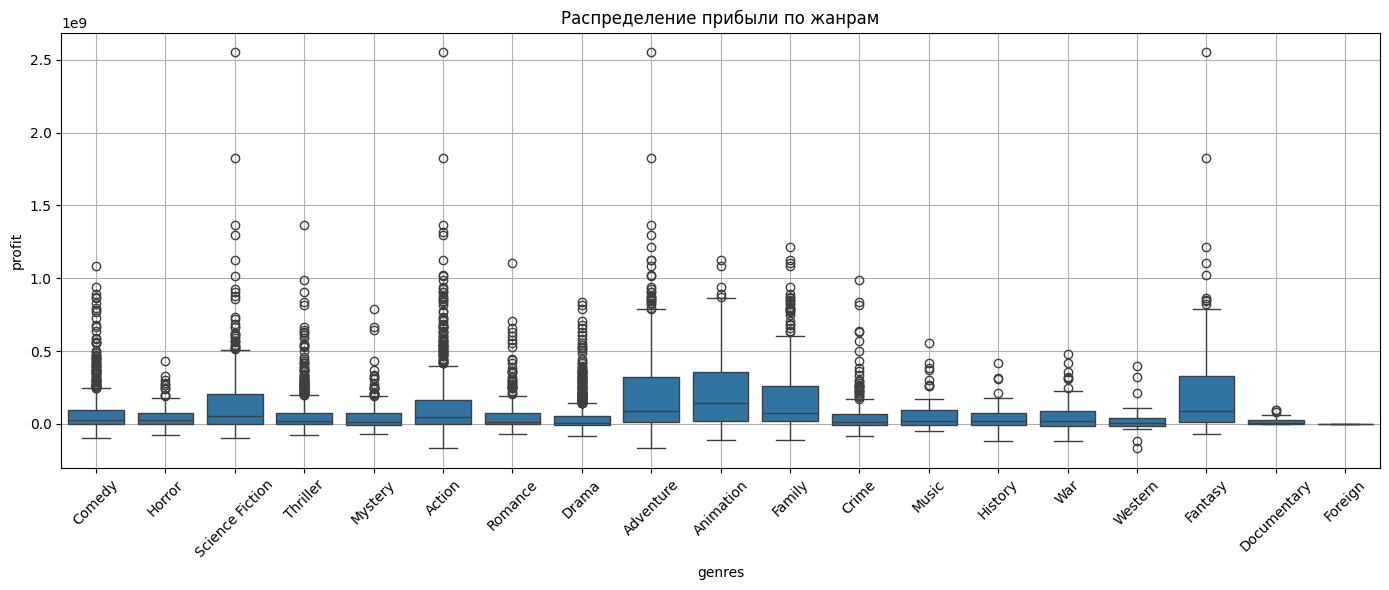

In [69]:
# Взрыв жанров
exploded_genres = df_movies.explode('genres')

# Группировка по жанрам
genre_stats = exploded_genres.groupby('genres').agg(
    count=('profit', 'count'),
    mean_profit=('profit', 'mean'),
    median_profit=('profit', 'median'),
    mean_budget=('budget', 'mean'),
    mean_revenue=('revenue', 'mean'),
    median_budget=('budget', 'median'),
    median_revenue=('revenue', 'median')
).sort_values('mean_profit', ascending=False)

genre_stats['is_profitable'] = genre_stats['mean_revenue'] / genre_stats['mean_budget'] > 2

# Визуализация
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=genre_stats.reset_index(), x='genres', y='mean_profit', hue='is_profitable', dodge=False)
plt.xticks(rotation=45)
plt.title('Средняя прибыль по жанрам (2000+, только США)')
plt.xlabel('Жанр')
plt.ylabel('Средняя прибыль')
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=exploded_genres[exploded_genres['genres'].isin(genre_stats.index)], x='genres', y='profit')
plt.xticks(rotation=45)
plt.title('Распределение прибыли по жанрам')
plt.tight_layout()
plt.grid(True)
plt.show()

# Список прибыльных жанров
profitable_genres = genre_stats[genre_stats['is_profitable']].index.tolist()

# Оставляем только прибыльные жанры
filtered_profitable = df_movies[
    df_movies['genres'].apply(lambda lst: any(g in profitable_genres for g in lst))
]

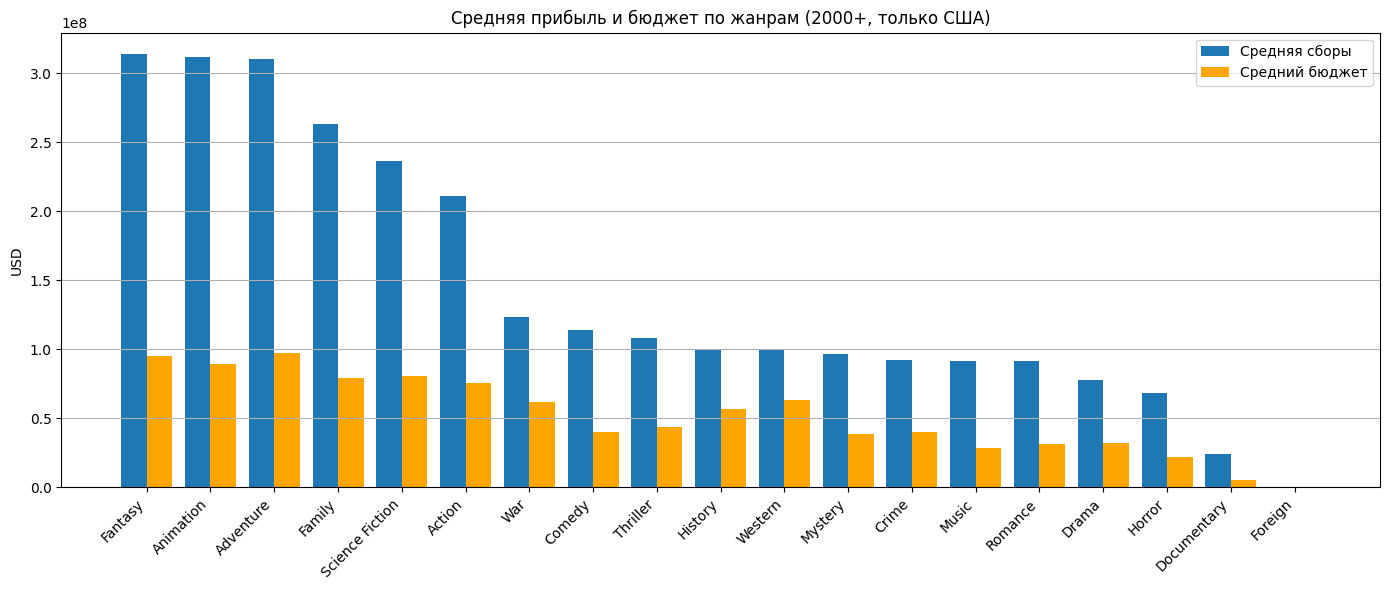

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Подготовка данных
plot_df = genre_stats.reset_index().sort_values('mean_revenue', ascending=False)
x = np.arange(len(plot_df))  # позиции жанров на оси X
width = 0.4  # ширина одного столбца

fig, ax = plt.subplots(figsize=(14, 6))

# Столбец: прибыль
profit_bars = ax.bar(x - width/2, plot_df['mean_revenue'], width=width, label='Средняя сборы')

# Столбец: бюджет
budget_bars = ax.bar(x + width/2, plot_df['mean_budget'], width=width, label='Средний бюджет', color='orange')

# Настройка осей
ax.set_xticks(x)
ax.set_xticklabels(plot_df['genres'], rotation=45, ha='right')
ax.set_ylabel('USD')
ax.set_title('Средняя прибыль и бюджет по жанрам (2000+, только США)')
ax.legend()
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()


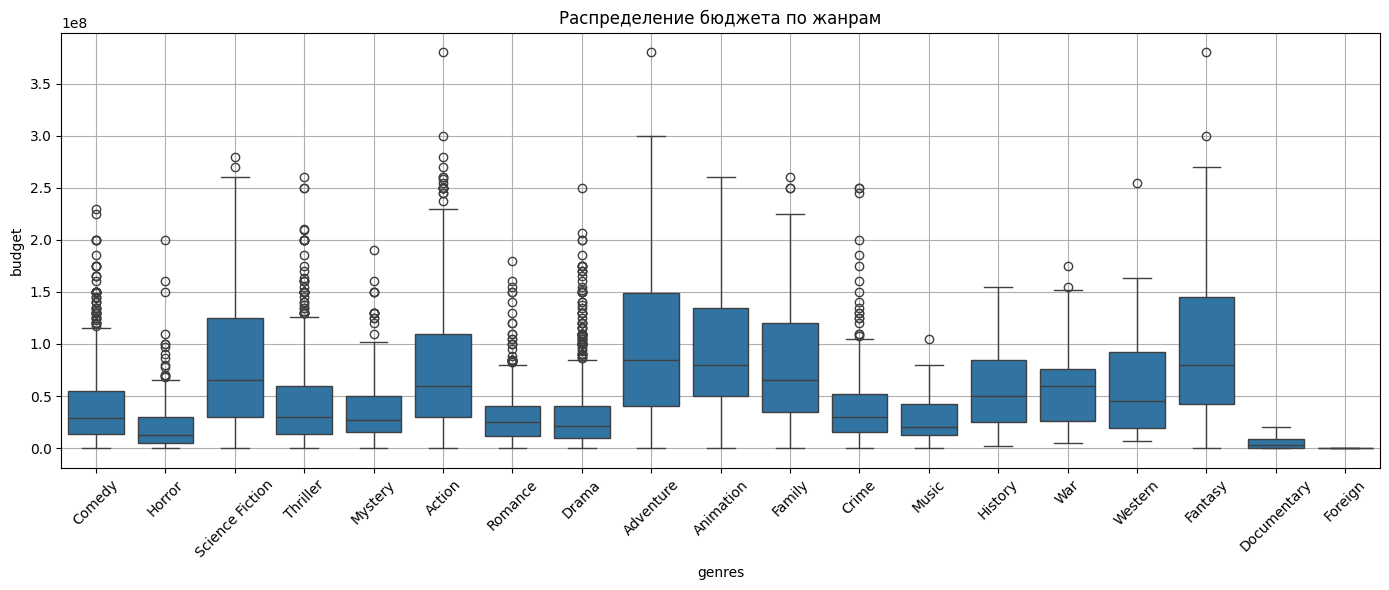

In [26]:
# Визуализация
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=exploded_genres[exploded_genres['genres'].isin(genre_stats.index)], x='genres', y='budget')
plt.xticks(rotation=45)
plt.title('Распределение бюджета по жанрам')
plt.tight_layout()
plt.grid(True)
plt.show()

6772


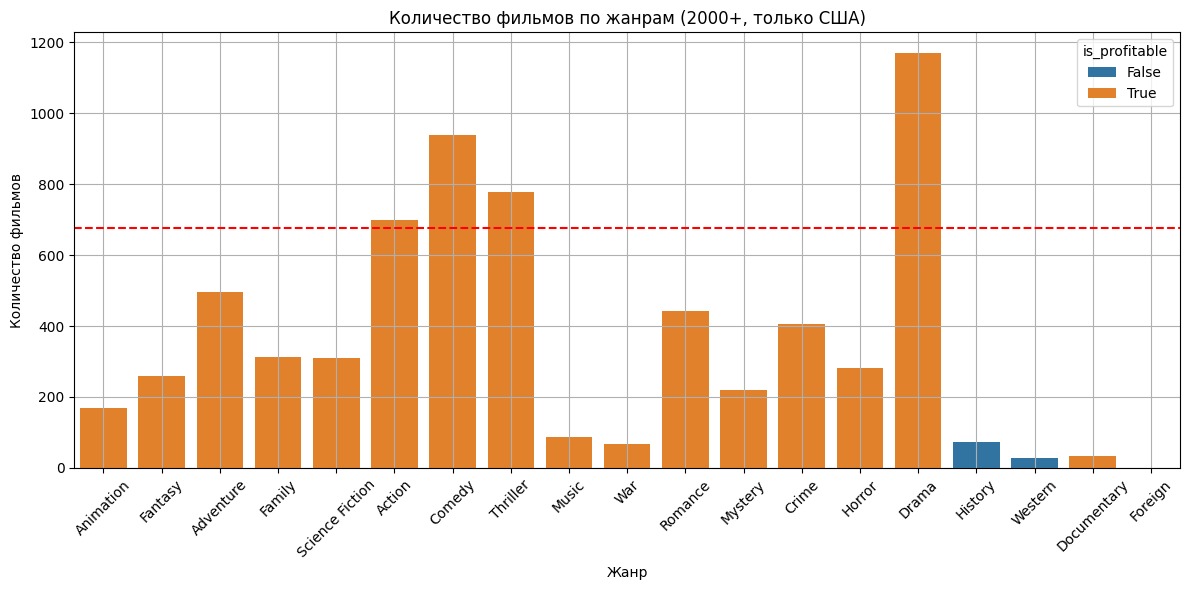

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

print(sum(genre_stats['count']))
threshold_10pct = sum(genre_stats['count']) * 0.1
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_stats.reset_index(), x='genres', y='count', hue='is_profitable', dodge=False)
plt.axhline(threshold_10pct, color='red', linestyle='--', label='10% от общего')
plt.xticks(rotation=45)
plt.title('Количество фильмов по жанрам (2000+, только США)')
plt.xlabel('Жанр')
plt.ylabel('Количество фильмов')
plt.grid(True)
plt.tight_layout()
plt.show()

Из этих графиков можно сделать выводы что: 

**Жанры:** `Animation`, `Fantasy`, `Family`, `Science Fiction`  
- Имеют высокую средную прибыль  
- Устойчивое распределение прибылей
- Связаны фильмами для всей семьи или фильмов для гиков.

**Рекомендуются как приоритетные направления для инвестиций.**

---

**Жанры:** `Action`, `Adventure`  
- Высокая средняя прибыль  
- Низкие "усы" на boxplot → много провалов  
- Высокие бюджеты → высокий риск больших убытков

Рекомендации:
- В этих жанрах придеться потратиться на другие факторы, которые будут влиять на успешность фильмов, например, звездный актеров.


---

**Жанры:** `Comedy`, `Thriller`, `Romance`, `Music`, `War`, `Drama`  
- Средняя прибыль  
- Высокая дисперсия результатов  
- Успешность этих жанров будет зависеть от сценария, актёров и рекламной кампании

Рекомендуются как часть диверсифицированного портфеля

---

###  Жанры с низкой прибылью и высоким риском

**Жанры:** `History`, `Western`, `Documentary`, `Foreign`  
- Низкая средняя и медианная прибыль  
- Малый рынок, ограниченная аудитория  
- Часто некоммерческие проекты

**Не рекомендуются для компаний с фокусом на прибыль**


In [44]:
# Жанры, которые мы анализируем
selected_genres = [
    'Animation', 'Fantasy', 'Adventure', 'Family', 
    'Science Fiction', 'Action', 'Comedy', 'Thriller', 'Romance'
]

# Оставим только фильмы с валидным бюджетом и прибылью
df_valid = exploded_genres[
    (exploded_genres['budget'] >= 100_000) &
    (exploded_genres['profit'].notnull())
].copy()

# Считаем ROI
df_valid['roi'] = df_valid['profit'] / df_valid['budget']



# Группируем по жанрам и собираем топ-3 по ROI
top_roi_by_genre = []

for genre in selected_genres:
    genre_df = df_valid[df_valid['genres'] == genre]
    top_films = genre_df.sort_values(by='roi', ascending=False).head(5)
    top_roi_by_genre.append(top_films[['genres', 'title', 'budget', 'revenue', 'profit', 'roi']])

# Объединяем в один DataFrame
import pandas as pd
top_roi_df = pd.concat(top_roi_by_genre).reset_index(drop=True)

# Сортировка по жанру для читаемости
top_roi_df = top_roi_df.sort_values(by='genres')

# Форматируем числовые значения с пробелами между разрядами
for col in ['budget', 'revenue', 'profit']:
    top_roi_df[col] = top_roi_df[col].apply(lambda x: f'{x:,.0f}'.replace(',', ' '))

# ROI — с двумя знаками после запятой
top_roi_df['roi'] = top_roi_df['roi'].apply(lambda x: f'{x:.2f}')

top_roi_df

,genres,title,budget,revenue,profit,roi
27,Action,Deadpool,58 000 000,783 112 979,725 112 979,12.50
25,Action,Wind River,11 000 000,184 770 205,173 770 205,15.80
29,Action,The Lord of the Rings: The Return of the King,94 000 000,1 118 888 979,1 024 888 979,10.90
28,Action,Despicable Me 3,80 000 000,1 020 063 384,940 063 384,11.75
26,Action,The Prince,18 000 000,266 586 800,248 586 800,13.81
14,Adventure,The Lord of the Rings: The Return of the King,94 000 000,1 118 888 979,1 024 888 979,10.90
13,Adventure,Despicable Me 3,80 000 000,1 020 063 384,940 063 384,11.75
12,Adventure,Deadpool,58 000 000,783 112 979,725 112 979,12.50
11,Adventure,The Twilight Saga: New Moon,50 000 000,709 827 462,659 827 462,13.20
10,Adventure,Minions,74 000 000,1 156 730 962,1 082 730 962,14.63


**Основные выводы:**
- Comedy, Thriller, Romance — высокая окупаемость при малом бюджете
- Action, Adventure, Animation, Family, Fantasy, Sci-Fi — требуют высокого бюджета для гиперуспешности проект
- Science Fiction и Fantasy — универсальные, возможны оба подхода

In [45]:
# Только фильмы с ROI от 2.5 до 5
# Это условие позволяет исключить фильмы с очень высоким ROI, которые могут быть выбросами
df_valid = df_valid[df_valid['roi'].between(2, 5)]

# Группируем по жанрам и собираем топ-3 по ROI
top_roi_by_genre = []

for genre in selected_genres:
    genre_df = df_valid[df_valid['genres'] == genre]
    top_films = genre_df.sort_values(by='roi', ascending=False).head(5)
    top_roi_by_genre.append(top_films[['genres', 'title', 'budget', 'revenue', 'profit', 'roi']])

# Объединяем в один DataFrame
import pandas as pd
top_roi_df = pd.concat(top_roi_by_genre).reset_index(drop=True)

# Сортировка по жанру для читаемости
top_roi_df = top_roi_df.sort_values(by='genres')

# Форматируем числовые значения с пробелами между разрядами
for col in ['budget', 'revenue', 'profit']:
    top_roi_df[col] = top_roi_df[col].apply(lambda x: f'{x:,.0f}'.replace(',', ' '))

# ROI — с двумя знаками после запятой
top_roi_df['roi'] = top_roi_df['roi'].apply(lambda x: f'{x:.2f}')

top_roi_df

,genres,title,budget,revenue,profit,roi
27,Action,Sherlock Holmes,90 000 000,524 028 679,434 028 679,4.82
25,Action,Spider-Man,139 000 000,821 708 551,682 708 551,4.91
29,Action,Transformers: Revenge of the Fallen,150 000 000,836 297 228,686 297 228,4.58
28,Action,Transformers: Dark of the Moon,195 000 000,1 123 746 996,928 746 996,4.76
26,Action,Jackass 3D,20 000 000,117 224 271,97 224 271,4.86
14,Adventure,Transformers: Revenge of the Fallen,150 000 000,836 297 228,686 297 228,4.58
13,Adventure,Transformers: Dark of the Moon,195 000 000,1 123 746 996,928 746 996,4.76
12,Adventure,Sherlock Holmes,90 000 000,524 028 679,434 028 679,4.82
11,Adventure,The Martian,108 000 000,630 161 890,522 161 890,4.83
10,Adventure,Harry Potter and the Goblet of Fire,150 000 000,895 921 036,745 921 036,4.97


- Thriller и Romance - также требуют низкий бюджет.
- Остальные жанры требуют бюджеты около 100 млн. долларов.

Объединяем жанры от Animation до Action в высокоприбыльные жанры, а от Music до Horror слабоприбыльные жанры. Добавляем is_comedy и is_thriller, is_drama. от history до foreign убирем.

In [70]:
# Классы жанров
high_profit_genres = [
    'Animation', 'Fantasy', 'Adventure', 'Family', 'Science Fiction', 'Action'
]

low_profit_genres = [
    'Romance', 'Crime', 'Music', 'War', 'Mystery', 'Horror'
]

exclude_genres = [
    'History', 'Western', 'Documentary', 'Foreign'
]

# Удаляем фильмы с только исключёнными жанрами
def keep_film(genres):
    genres_set = set(genres)
    return not genres_set.issubset(set(exclude_genres))

df_movies = df_movies[df_movies['genres'].apply(keep_film)].copy()

In [71]:
# Создание индикаторов жанров, которые нам важны
genres_to_check = ['Comedy', 'Thriller', 'Drama']

for genre in genres_to_check:
    df_movies[f'is_{genre}'] = df_movies['genres'].apply(
        lambda x: genre in x
    )

In [72]:
def classify_profit_genre(genres):
    for g in genres:
        if g in high_profit_genres:
            return 'high'
        elif g in low_profit_genres:
            return 'low'
    return 'unknown'

df_movies['genre_profit_class'] = df_movies['genres'].apply(classify_profit_genre)
df_movies['is_high_genre_profit'] = df_movies['genre_profit_class'] == 'high'
df_movies['is_low_genre_profit'] = df_movies['genre_profit_class'] == 'low'

In [73]:
df_movies['genre_profit_class'].value_counts()

genre_profit_class
high       1087
low         929
unknown     565
Name: count, dtype: int64

In [74]:
print("Пропуски в df_movies:")
print(df_movies.isna().sum())

Пропуски в df_movies:
budget                  0
genres                  0
id                      0
original_language       0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
release_year            0
release_week            0
profit                  0
is_Comedy               0
is_Thriller             0
is_Drama                0
genre_profit_class      0
is_high_genre_profit    0
is_low_genre_profit     0
dtype: int64


### Удаление na значений и нулевых

In [206]:
df_movies['vote_count'] = df_movies['vote_count'].astype('int64')
df_movies['budget'] = df_movies['budget'].astype('int64')
df_movies['revenue'] = df_movies['revenue'].astype('int64')
df_movies['popularity'] = df_movies['popularity'].astype('float64')

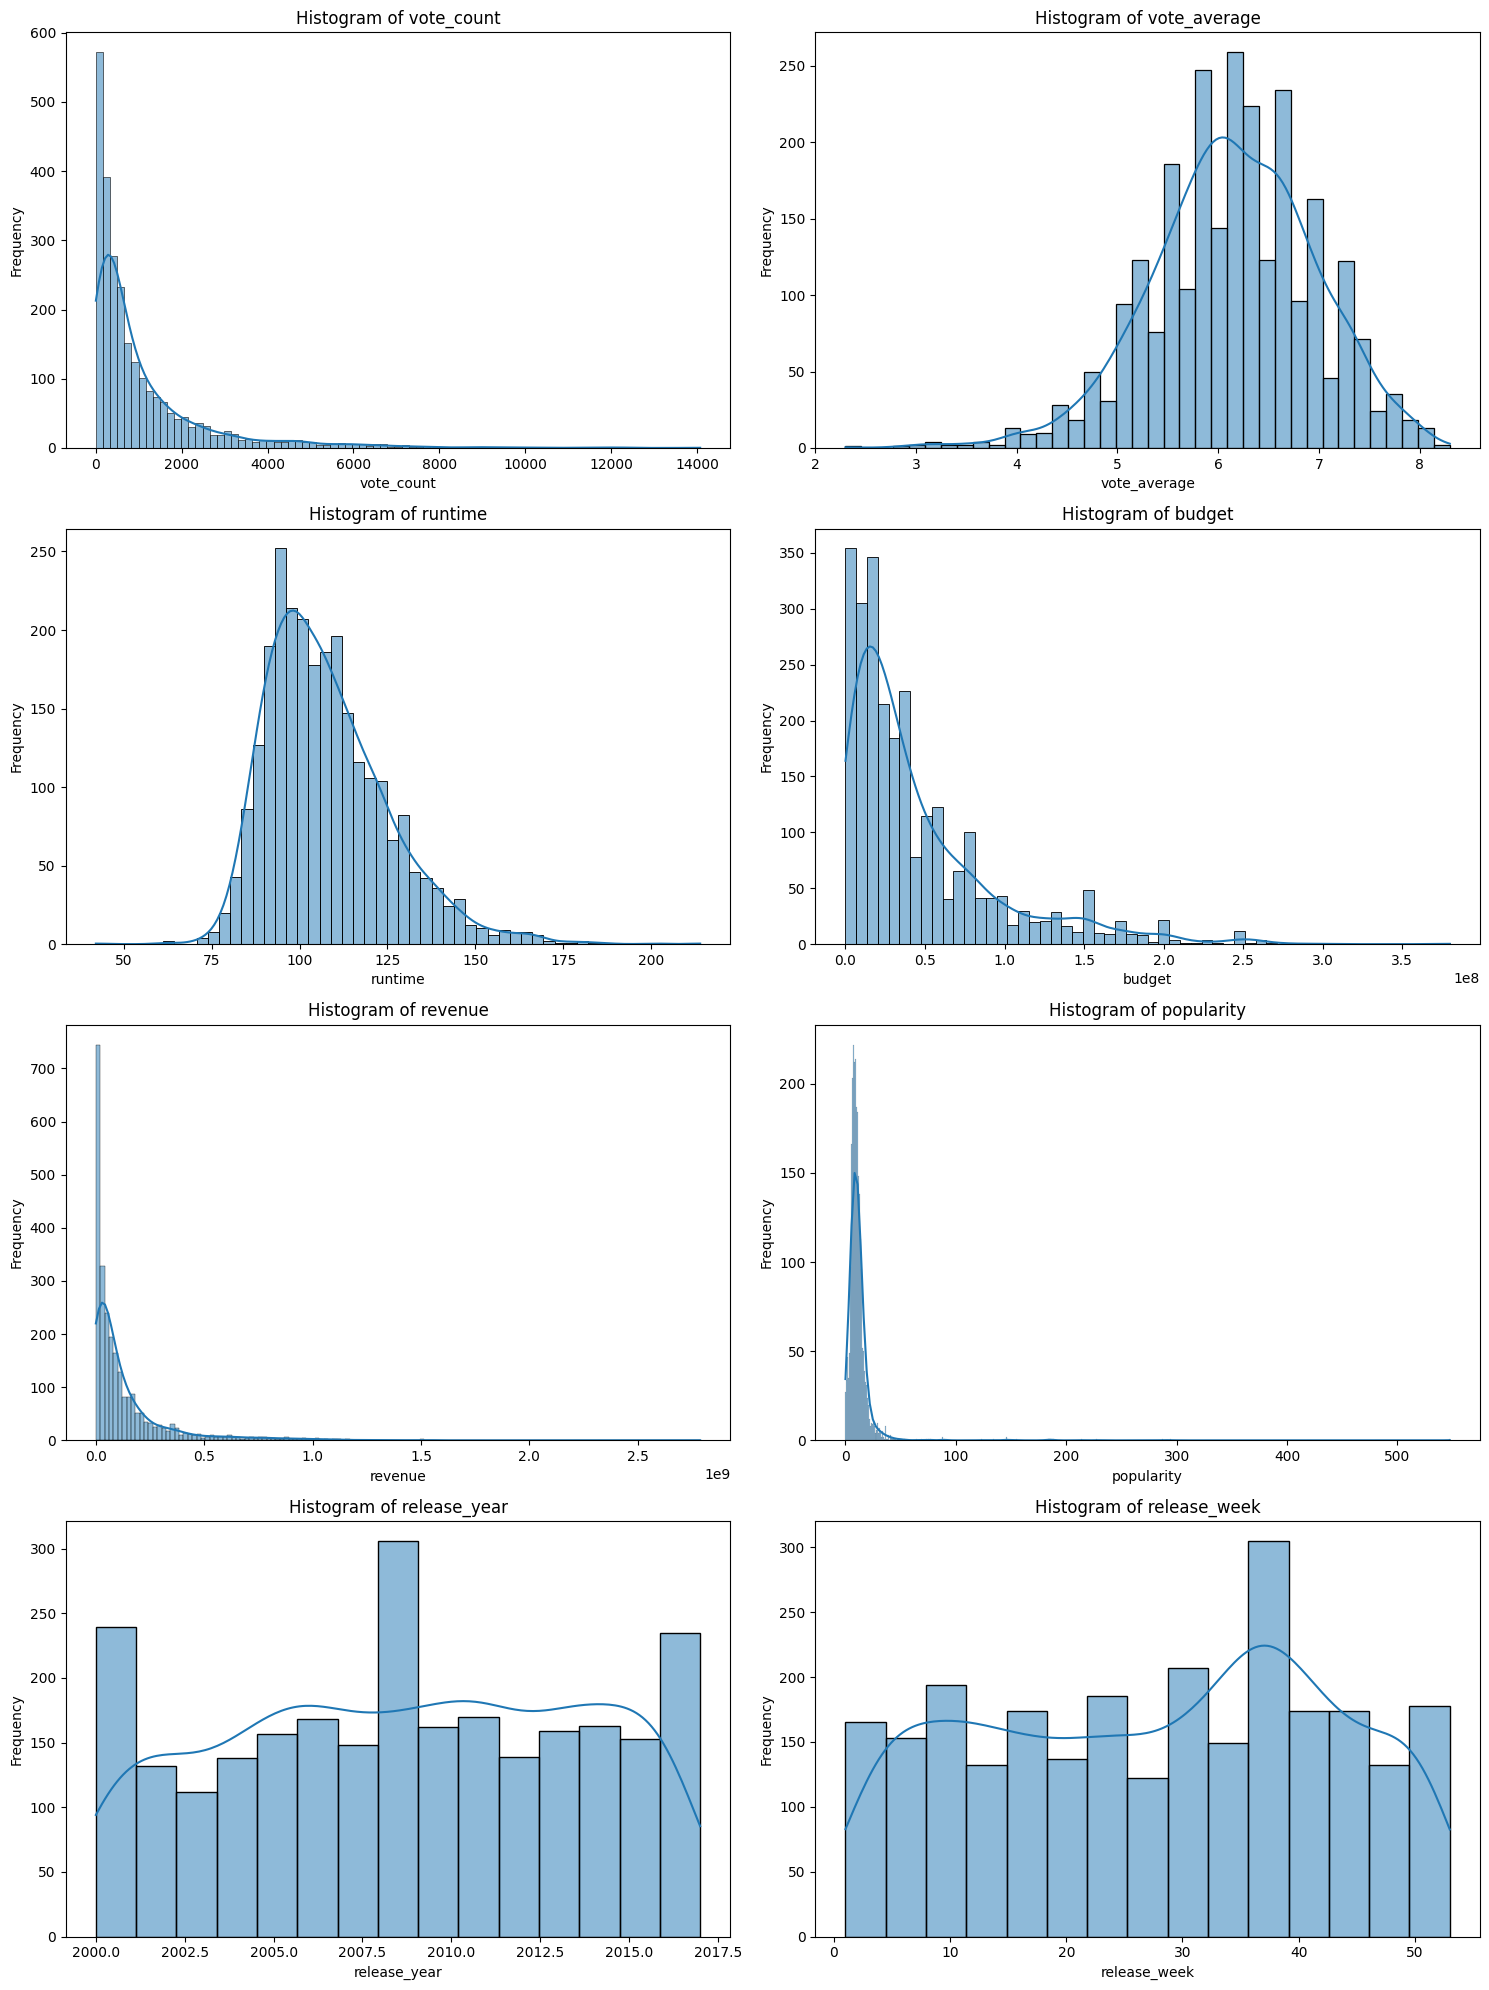

In [76]:
numeric_column = ['vote_count', 'vote_average', 'runtime', 'budget', 'revenue', 'popularity', 'release_year', 'release_week']

import matplotlib.pyplot as plt
import seaborn as sns

# Создаем фигуру с подзаголовками 4x2
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Перебираем столбцы и создаем гистограммы
for i, column in enumerate(numeric_column):
    # Определяем позицию подзаголовка
    row, col = divmod(i, 2)
    # Создаем гистограмму
    sns.histplot(data=df_movies, x=column, kde=True, ax=axes[row, col])
    # Добавляем заголовок и метки
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Настраиваем расстояние между подзаголовками
plt.tight_layout()
plt.show()

In [77]:
mask_is_null = ((df_movies['revenue'] == 0) | (df_movies['runtime'] == 0) |
                (df_movies['budget'] == 0) | (df_movies['vote_count'] == 0) | (df_movies['vote_average'] == 0))

df_movies = df_movies[~mask_is_null]

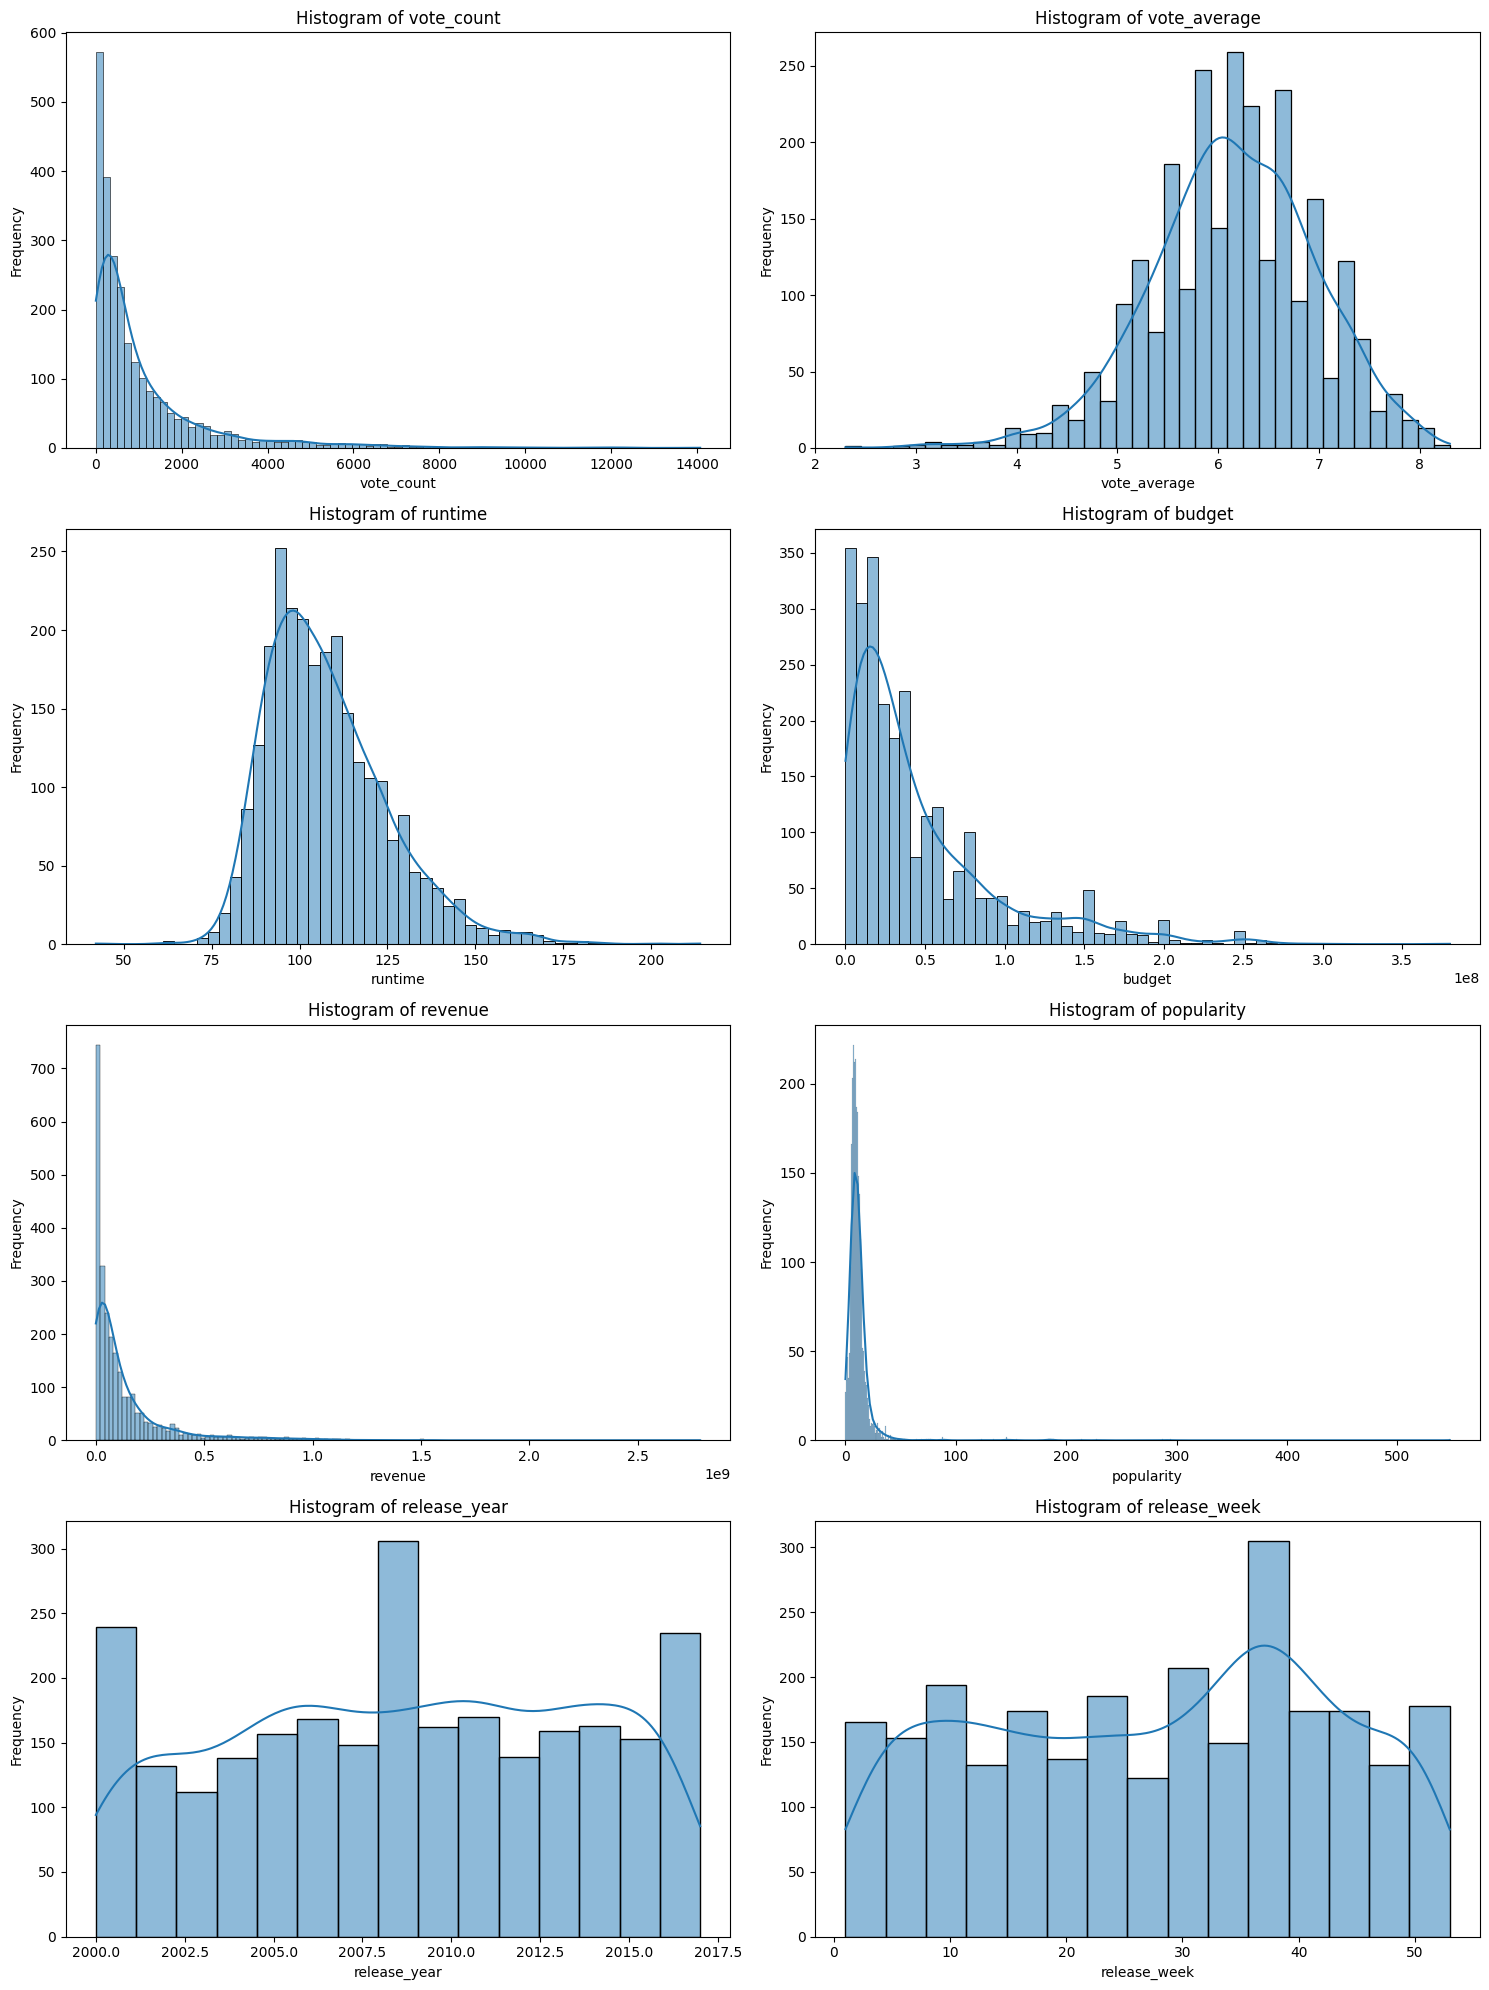

In [78]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Перебираем столбцы и создаем гистограммы
for i, column in enumerate(numeric_column):
    # Определяем позицию подзаголовка
    row, col = divmod(i, 2)
    # Создаем гистограмму
    sns.histplot(data=df_movies, x=column, kde=True, ax=axes[row, col])
    # Добавляем заголовок и метки
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Настраиваем расстояние между подзаголовками
plt.tight_layout()
plt.show()

## Кластеризация актеров

### Преобразуем cast и получает таблицу актеров с фильмами

In [120]:
import ast
from collections import defaultdict
# Если cast ещё не преобразован в списки
df_cast['cast'] = df_cast['cast'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Заменим NaN на пустые списки
df_cast['cast'] = df_cast['cast'].fillna("").apply(lambda x: x if isinstance(x, list) else [])

In [121]:
df_cast['cast'].head(10)

0    [{'cast_id': 14, 'character': 'Woody (voice)',...
1    [{'cast_id': 1, 'character': 'Alan Parrish', '...
2    [{'cast_id': 2, 'character': 'Max Goldman', 'c...
3    [{'cast_id': 1, 'character': 'Savannah 'Vannah...
4    [{'cast_id': 1, 'character': 'George Banks', '...
5    [{'cast_id': 25, 'character': 'Lt. Vincent Han...
6    [{'cast_id': 1, 'character': 'Linus Larrabee',...
7    [{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...
8    [{'cast_id': 1, 'character': 'Darren Francis T...
9    [{'cast_id': 1, 'character': 'James Bond', 'cr...
Name: cast, dtype: object

In [122]:
# Список для хранения данных
actor_movie_data = []

# Проходим по каждой строке df_cast
for idx, row in df_cast.iterrows():
    movie_id = row['id']
    cast_list = row['cast']
    
    # Для каждого актёра в фильме
    for actor in cast_list:
        # Проверяем, что это словарь (на случай некорректных данных)
        if isinstance(actor, dict):
            actor_movie_data.append({
                'movie_id': movie_id,
                'actor_id': actor.get('id'),
                'actor_name': actor.get('name'),
                'character': actor.get('character'),
                'order': actor.get('order')
            })

# Создаем DataFrame
df_actor_movies = pd.DataFrame(actor_movie_data)

In [123]:
df_actor_movies.head()

,movie_id,actor_id,actor_name,character,order
0,862,31,Tom Hanks,Woody (voice),0
1,862,12898,Tim Allen,Buzz Lightyear (voice),1
2,862,7167,Don Rickles,Mr. Potato Head (voice),2
3,862,12899,Jim Varney,Slinky Dog (voice),3
4,862,12900,Wallace Shawn,Rex (voice),4


In [133]:
df_actor_movies[['actor_name', 'movie_id', 'order']].value_counts().head(10)

actor_name             movie_id  order
조병만                    306598    1        1
\tCheung Chi-Sing      17082     12       1
\tDouglas Hegdahl      56235     8        1
\tRobert Osth          39867     1        1
\tYip Chun             32151     9        1
                       41387     8        1
  Jorge de los Reyes   242575    11       1
  Liu Jin              25626     8        1
 Alistair Freeland     42968     3        1
 Antanas Barčas        278730    7        1
Name: count, dtype: int64

In [132]:
df_actor_movies = df_actor_movies[['actor_name', 'movie_id', 'order']].drop_duplicates()

In [134]:
df_movies[df_movies['id'] == 3506][['title', 'release_date', 'budget', 'revenue']]

,title,release_date,budget,revenue


In [135]:
df_movies['id'] = df_movies['id'].astype('int64')
df_movies['id'].isna().sum()

np.int64(0)

In [136]:
df_full_actor = pd.merge(
    df_actor_movies,
    df_movies,
    left_on='movie_id',
    right_on='id',
    how='inner'
)

# Удаляем дублирующую колонку
df_full_actor = df_full_actor.drop(columns=['id'])

In [137]:
df_full_actor.head()

,actor_name,movie_id,order,budget,genres,original_language,popularity,production_countries,release_date,revenue,...,vote_count,release_year,release_week,profit,is_Comedy,is_Thriller,is_Drama,genre_profit_class,is_high_genre_profit,is_low_genre_profit
0,Ice Cube,10471,0,11000000,[Comedy],en,10.06545,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328,...,145,2000,2,48827328,True,False,False,unknown,False,False
1,Mike Epps,10471,1,11000000,[Comedy],en,10.06545,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328,...,145,2000,2,48827328,True,False,False,unknown,False,False
2,Justin Pierce,10471,2,11000000,[Comedy],en,10.06545,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328,...,145,2000,2,48827328,True,False,False,unknown,False,False
3,John Witherspoon,10471,3,11000000,[Comedy],en,10.06545,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328,...,145,2000,2,48827328,True,False,False,unknown,False,False
4,Don Curry,10471,4,11000000,[Comedy],en,10.06545,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328,...,145,2000,2,48827328,True,False,False,unknown,False,False


In [138]:
df_full_actor.isna().sum()

actor_name              0
movie_id                0
order                   0
budget                  0
genres                  0
original_language       0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
release_year            0
release_week            0
profit                  0
is_Comedy               0
is_Thriller             0
is_Drama                0
genre_profit_class      0
is_high_genre_profit    0
is_low_genre_profit     0
dtype: int64

### Лучшие актеры

In [139]:
# Группировка по актёрам
actor_stats = df_full_actor.groupby('actor_name').agg(
    movie_count=('revenue', 'count'),
    avg_revenue=('revenue', 'mean'),
    avg_budget=('budget', 'mean'),
    avg_profit=('profit', 'mean'),
    total_revenue=('revenue', 'sum'),
    avg_popularity=('popularity', 'mean'),
    total_profit=('profit', 'sum')
).sort_values('movie_count', ascending=False)

# Оставим только актёров с 5+ фильмами
actor_stats = actor_stats[actor_stats['movie_count'] >= 5].copy()

# Универсальная функция для форматирования
def format_all_columns(df):
    df = df.copy()
    for col in df.columns:
        if 'popularity' in col:
            df[col] = df[col].apply(lambda x: f'{x:.2f}')
        else:
            df[col] = df[col].apply(lambda x: f'{x:,.0f}'.replace(',', ' '))
    return df

# Сортировки и форматирование
top_10_avg_revenue = format_all_columns(actor_stats.sort_values('avg_revenue', ascending=False).head(10))
top_10_avg_budget = format_all_columns(actor_stats.sort_values('avg_budget', ascending=False).head(10))
top_10_avg_profit = format_all_columns(actor_stats.sort_values('avg_profit', ascending=False).head(10))
top_10_total_revenue = format_all_columns(actor_stats.sort_values('total_revenue', ascending=False).head(10))
top_10_avg_popularity = format_all_columns(actor_stats.sort_values('avg_popularity', ascending=False).head(10))
top_10_total_profit = format_all_columns(actor_stats.sort_values('total_profit', ascending=False).head(10))

# Вывод
print("🎬 Топ-10 актёров по средней выручке:")
display(top_10_avg_revenue)

print("🎬 Топ-10 актёров по средней стоимости фильмов:")
display(top_10_avg_budget)

print("🎬 Топ-10 актёров по средней прибыли:")
display(top_10_avg_profit)

print("🎬 Топ-10 актёров по общей выручке:")
display(top_10_total_revenue)

print("🎬 Топ-10 актёров по средней популярности:")
display(top_10_avg_popularity)

print("🎬 Топ-10 актёров по общей прибыли:")
display(top_10_total_profit)


🎬 Топ-10 актёров по средней выручке:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Afshan Azad,5,1 012 879 768,185 000 000,827 879 768,5 064 398 839,22.73,4 139 398 839
Katie Leung,5,1 012 879 768,185 000 000,827 879 768,5 064 398 839,22.73,4 139 398 839
Chris Rankin,5,984 636 265,126 000 000,858 636 265,4 923 181 324,28.55,4 293 181 324
Alfie Enoch,7,964 723 080,147 142 857,817 580 222,6 753 061 557,26.68,5 723 061 557
Bonnie Wright,8,963 420 928,160 000 000,803 420 928,7 707 367 425,26.25,6 427 367 425
Oliver Phelps,8,963 420 928,160 000 000,803 420 928,7 707 367 425,26.25,6 427 367 425
Josh Herdman,8,963 420 928,160 000 000,803 420 928,7 707 367 425,26.25,6 427 367 425
Devon Murray,8,963 420 928,160 000 000,803 420 928,7 707 367 425,26.25,6 427 367 425
James Phelps,8,963 420 928,160 000 000,803 420 928,7 707 367 425,26.25,6 427 367 425


🎬 Топ-10 актёров по средней стоимости фильмов:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Nick W. Nicholson,5,783 848 230,215 000 000,568 848 230,3 919 241 151,23.00,2 844 241 151
Adam Brown,5,759 325 857,206 000 000,553 325 857,3 796 629 283,48.63,2 766 629 283
Karl Farrer,7,595 427 533,186 428 571,408 998 962,4 167 992 734,66.94,2 862 992 734
Katie Leung,5,1 012 879 768,185 000 000,827 879 768,5 064 398 839,22.73,4 139 398 839
Afshan Azad,5,1 012 879 768,185 000 000,827 879 768,5 064 398 839,22.73,4 139 398 839
Debbie Scaletta,5,879 342 646,185 000 000,694 342 646,4 396 713 231,39.27,3 471 713 231
Richard Armitage,6,627 677 568,185 000 000,442 677 568,3 766 065 408,19.77,2 656 065 408
Greg Ellis,6,540 535 842,184 166 667,356 369 176,3 243 215 054,23.10,2 138 215 054
Peter Donald Badalamenti II,5,575 911 060,183 000 000,392 911 060,2 879 555 299,20.00,1 964 555 299


🎬 Топ-10 актёров по средней прибыли:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Chris Rankin,5,984 636 265,126 000 000,858 636 265,4 923 181 324,28.55,4 293 181 324
Afshan Azad,5,1 012 879 768,185 000 000,827 879 768,5 064 398 839,22.73,4 139 398 839
Katie Leung,5,1 012 879 768,185 000 000,827 879 768,5 064 398 839,22.73,4 139 398 839
Alfie Enoch,7,964 723 080,147 142 857,817 580 222,6 753 061 557,26.68,5 723 061 557
Josh Herdman,8,963 420 928,160 000 000,803 420 928,7 707 367 425,26.25,6 427 367 425
James Phelps,8,963 420 928,160 000 000,803 420 928,7 707 367 425,26.25,6 427 367 425
Oliver Phelps,8,963 420 928,160 000 000,803 420 928,7 707 367 425,26.25,6 427 367 425
Devon Murray,8,963 420 928,160 000 000,803 420 928,7 707 367 425,26.25,6 427 367 425
Bonnie Wright,8,963 420 928,160 000 000,803 420 928,7 707 367 425,26.25,6 427 367 425


🎬 Топ-10 актёров по общей выручке:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Stan Lee,29,669 408 103,168 206 897,501 201 207,19 412 834 994,47.77,14 534 834 994
Samuel L. Jackson,42,315 417 542,90 718 214,224 699 328,13 247 536 757,18.05,9 437 371 757
Jess Harnell,19,628 772 630,126 789 474,501 983 156,11 946 679 969,15.72,9 537 679 969
Warwick Davis,14,834 156 949,159 642 857,674 514 092,11 678 197 288,23.30,9 443 197 288
Ian McKellen,16,673 858 949,154 062 500,519 796 449,10 781 743 180,33.82,8 316 743 180
Andy Serkis,16,640 540 499,132 437 500,508 102 999,10 248 647 982,34.19,8 129 647 982
John Ratzenberger,16,631 594 985,155 375 000,476 219 985,10 105 519 760,18.08,7 619 519 760
Alan Tudyk,24,416 849 416,85 312 500,331 536 916,10 004 385 990,22.68,7 956 885 990
Johnny Depp,29,339 284 609,115 993 103,223 291 505,9 839 253 658,19.83,6 475 453 658


🎬 Топ-10 актёров по средней популярности:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Anthony J. Sacco,5,797 968 681,167 400 000,630 568 681,3 989 843 405,110.99,3 152 843 405
Clem So,5,540 038 330,143 200 001,396 838 329,2 700 191 648,83.93,1 984 191 645
Hiroyuki Sanada,8,333 052 587,109 625 000,223 427 587,2 664 420 699,81.46,1 787 420 699
Dino Fazzani,6,531 255 568,157 333 333,373 922 235,3 187 533 411,76.25,2 243 533 411
Karen Gillan,5,366 923 873,84 200 000,282 723 873,1 834 619 366,69.78,1 413 619 366
James Cosmo,5,438 148 242,127 800 000,310 348 242,2 190 741 212,69.25,1 551 741 212
Rainer Bock,5,314 730 941,70 000 000,244 730 941,1 573 654 706,68.03,1 223 654 706
Katy Mixon,9,168 748 667,34 988 889,133 759 778,1 518 738 000,67.82,1 203 838 000
Dan Stevens,5,335 282 878,69 600 000,265 682 878,1 676 414 388,67.80,1 328 414 388


🎬 Топ-10 актёров по общей прибыли:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Stan Lee,29,669 408 103,168 206 897,501 201 207,19 412 834 994,47.77,14 534 834 994
Jess Harnell,19,628 772 630,126 789 474,501 983 156,11 946 679 969,15.72,9 537 679 969
Warwick Davis,14,834 156 949,159 642 857,674 514 092,11 678 197 288,23.30,9 443 197 288
Samuel L. Jackson,42,315 417 542,90 718 214,224 699 328,13 247 536 757,18.05,9 437 371 757
Ian McKellen,16,673 858 949,154 062 500,519 796 449,10 781 743 180,33.82,8 316 743 180
Andy Serkis,16,640 540 499,132 437 500,508 102 999,10 248 647 982,34.19,8 129 647 982
Alan Tudyk,24,416 849 416,85 312 500,331 536 916,10 004 385 990,22.68,7 956 885 990
Emma Watson,15,638 856 885,113 533 333,525 323 552,9 582 853 278,43.01,7 879 853 278
Alan Rickman,17,567 880 934,107 588 235,460 292 699,9 653 975 876,17.43,7 824 975 876


Оказалось, что лидеры по средней выручке актеры, которые сыграли только в фильмах о Гарри Поттере.

В основном в рейтингах оказались люди, которые играют второстепенные роли.

In [140]:
# Группировка по актёрам
actor_stats = df_full_actor[df_full_actor['order'] < 5].groupby('actor_name').agg(
    movie_count=('revenue', 'count'),
    avg_revenue=('revenue', 'mean'),
    avg_budget=('budget', 'mean'),
    avg_profit=('profit', 'mean'),
    total_revenue=('revenue', 'sum'),
    avg_popularity=('popularity', 'mean'),
    total_profit=('profit', 'sum')
).sort_values('movie_count', ascending=False)

# Только те, у кого 5+ фильмов
actor_stats = actor_stats[actor_stats['movie_count'] >= 5].copy()

# Универсальная функция для форматирования
def format_all_columns(df):
    df = df.copy()
    for col in df.columns:
        if 'popularity' in col:
            df[col] = df[col].apply(lambda x: f'{x:.2f}')
        else:
            df[col] = df[col].apply(lambda x: f'{x:,.0f}'.replace(',', ' '))
    return df

# Сортировки и форматирование
top_10_avg_revenue = format_all_columns(actor_stats.sort_values('avg_revenue', ascending=False).head(10))
top_10_avg_budget = format_all_columns(actor_stats.sort_values('avg_budget', ascending=False).head(10))
top_10_avg_profit = format_all_columns(actor_stats.sort_values('avg_profit', ascending=False).head(10))
top_10_total_revenue = format_all_columns(actor_stats.sort_values('total_revenue', ascending=False).head(10))
top_10_avg_popularity = format_all_columns(actor_stats.sort_values('avg_popularity', ascending=False).head(10))
top_10_total_profit = format_all_columns(actor_stats.sort_values('total_profit', ascending=False).head(10))

# Вывод
print("🎬 Топ-10 актёров по средней выручке:")
display(top_10_avg_revenue)

print("🎬 Топ-10 актёров по средней стоимости фильмов:")
display(top_10_avg_budget)

print("🎬 Топ-10 актёров по средней прибыли:")
display(top_10_avg_profit)

print("🎬 Топ-10 актёров по общей выручке:")
display(top_10_total_revenue)

print("🎬 Топ-10 актёров по средней популярности:")
display(top_10_avg_popularity)

print("🎬 Топ-10 актёров по общей прибыли:")
display(top_10_total_profit)


🎬 Топ-10 актёров по средней выручке:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Rupert Grint,9,856 378 647,142 777 778,713 600 869,7 707 407 825,23.75,6 422 407 825
Ian McKellen,11,713 432 591,153 181 818,560 250 773,7 847 758 505,17.97,6 162 758 505
Daniel Radcliffe,11,704 168 332,120 636 364,583 531 968,7 745 851 651,21.21,6 418 851 651
Emma Watson,14,675 486 568,119 357 143,556 129 425,9 456 811 956,45.26,7 785 811 956
Denis Leary,6,661 487 402,107 333 333,554 154 068,3 968 924 410,18.58,3 324 924 410
Orlando Bloom,11,590 143 943,122 636 364,467 507 579,6 491 583 368,23.37,5 142 583 368
Mike Myers,6,549 046 917,110 000 000,439 046 917,3 294 281 503,12.52,2 634 281 503
Oscar Isaac,5,547 031 125,93 800 000,453 231 125,2 735 155 625,20.75,2 266 155 625
Ray Romano,6,538 451 426,76 500 000,461 951 426,3 230 708 553,14.03,2 771 708 553


🎬 Топ-10 актёров по средней стоимости фильмов:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Ian McKellen,11,713 432 591,153 181 818,560 250 773,7 847 758 505,17.97,6 162 758 505
Rupert Grint,9,856 378 647,142 777 778,713 600 869,7 707 407 825,23.75,6 422 407 825
Geoffrey Rush,6,441 654 528,140 750 000,300 904 528,2 649 927 167,39.02,1 805 427 167
Ian McShane,7,289 958 469,140 285 714,149 672 755,2 029 709 285,15.20,1 047 709 285
Eva Green,5,363 397 950,136 000 000,227 397 950,1 816 989 752,20.00,1 136 989 752
Daniel Craig,13,371 982 948,131 153 846,240 829 102,4 835 778 323,14.40,3 130 778 323
Henry Cavill,5,377 603 684,129 000 000,248 603 684,1 888 018 421,17.22,1 243 018 421
Johnny Depp,24,352 663 464,125 416 667,227 246 797,8 463 923 133,20.82,5 453 923 133
Martin Freeman,7,441 933 083,124 285 714,317 647 369,3 093 531 582,16.00,2 223 531 582


🎬 Топ-10 актёров по средней прибыли:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Rupert Grint,9,856 378 647,142 777 778,713 600 869,7 707 407 825,23.75,6 422 407 825
Daniel Radcliffe,11,704 168 332,120 636 364,583 531 968,7 745 851 651,21.21,6 418 851 651
Ian McKellen,11,713 432 591,153 181 818,560 250 773,7 847 758 505,17.97,6 162 758 505
Emma Watson,14,675 486 568,119 357 143,556 129 425,9 456 811 956,45.26,7 785 811 956
Denis Leary,6,661 487 402,107 333 333,554 154 068,3 968 924 410,18.58,3 324 924 410
Orlando Bloom,11,590 143 943,122 636 364,467 507 579,6 491 583 368,23.37,5 142 583 368
Ray Romano,6,538 451 426,76 500 000,461 951 426,3 230 708 553,14.03,2 771 708 553
Oscar Isaac,5,547 031 125,93 800 000,453 231 125,2 735 155 625,20.75,2 266 155 625
Michelle Rodriguez,14,532 384 837,87 714 286,444 670 552,7 453 387 721,22.96,6 225 387 721


🎬 Топ-10 актёров по общей выручке:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Emma Watson,14,675 486 568,119 357 143,556 129 425,9 456 811 956,45.26,7 785 811 956
Johnny Depp,24,352 663 464,125 416 667,227 246 797,8 463 923 133,20.82,5 453 923 133
Robert Downey Jr.,18,454 998 147,109 305 556,345 692 592,8 189 966 653,26.99,6 222 466 653
Ian McKellen,11,713 432 591,153 181 818,560 250 773,7 847 758 505,17.97,6 162 758 505
Daniel Radcliffe,11,704 168 332,120 636 364,583 531 968,7 745 851 651,21.21,6 418 851 651
Scarlett Johansson,22,350 786 184,87 013 636,263 772 548,7 717 296 048,26.67,5 802 996 048
Rupert Grint,9,856 378 647,142 777 778,713 600 869,7 707 407 825,23.75,6 422 407 825
Vin Diesel,20,381 828 046,90 750 000,291 078 046,7 636 560 929,22.48,5 821 560 929
Samuel L. Jackson,31,240 877 994,76 989 194,163 888 801,7 467 217 821,15.19,5 080 552 821


🎬 Топ-10 актёров по средней популярности:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Jon Hamm,8,201 766 565,26 628 750,175 137 815,1 614 132 519,102.33,1 401 102 519
Allison Janney,6,260 126 320,48 833 333,211 292 986,1 560 757 917,96.49,1 267 757 917
Michael Keaton,8,354 889 300,64 625 000,290 264 300,2 839 114 402,80.07,2 322 114 402
Luke Evans,7,272 711 423,56 382 135,216 329 287,1 908 979 958,49.73,1 514 305 010
Jamie Chung,5,163 159 242,61 900 000,101 259 242,815 796 209,49.32,506 296 209
Josh Gad,8,431 207 935,67 875 000,363 332 935,3 449 663 483,48.71,2 906 663 483
Emma Watson,14,675 486 568,119 357 143,556 129 425,9 456 811 956,45.26,7 785 811 956
Bridget Moynahan,5,108 195 801,42 740 000,65 455 801,540 979 004,45.25,327 279 004
Andy Serkis,7,391 031 221,119 857 143,271 174 079,2 737 218 550,43.88,1 898 218 550


🎬 Топ-10 актёров по общей прибыли:


,movie_count,avg_revenue,avg_budget,avg_profit,total_revenue,avg_popularity,total_profit
actor_name,,,,,,,
Emma Watson,14,675 486 568,119 357 143,556 129 425,9 456 811 956,45.26,7 785 811 956
Rupert Grint,9,856 378 647,142 777 778,713 600 869,7 707 407 825,23.75,6 422 407 825
Daniel Radcliffe,11,704 168 332,120 636 364,583 531 968,7 745 851 651,21.21,6 418 851 651
Michelle Rodriguez,14,532 384 837,87 714 286,444 670 552,7 453 387 721,22.96,6 225 387 721
Robert Downey Jr.,18,454 998 147,109 305 556,345 692 592,8 189 966 653,26.99,6 222 466 653
Ian McKellen,11,713 432 591,153 181 818,560 250 773,7 847 758 505,17.97,6 162 758 505
Vin Diesel,20,381 828 046,90 750 000,291 078 046,7 636 560 929,22.48,5 821 560 929
Scarlett Johansson,22,350 786 184,87 013 636,263 772 548,7 717 296 048,26.67,5 802 996 048
Johnny Depp,24,352 663 464,125 416 667,227 246 797,8 463 923 133,20.82,5 453 923 133


В основном в рейтингах актеры игравшие в франшизах Гарри Поттер, Форсаж, Властелин Колец, Люди Икс и Мстители(+Пираты)

### feature_engeniring

In [141]:
df_full_actor_anal = df_full_actor[['actor_name', 'order', 'budget', 'popularity', 'release_year', 'vote_average', 'revenue']]

# Разделяем данные на первые и вторые роли
first_roles = df_full_actor_anal[df_full_actor_anal['order'] <= 2]
second_roles = df_full_actor_anal[(df_full_actor_anal['order'] > 2) & (df_full_actor_anal['order'] <= 5)]

# Функция для создания фич с префиксом
def create_role_features(df, prefix):
    features = df.groupby('actor_name').agg({
        'budget': [
            ('mean', 'mean'),
        ],
        'revenue': [
            ('mean', 'mean'),
        ],
        'popularity': [
            ('mean', 'mean'),
        ],
        'vote_average': [('mean', 'mean')],
        'order': [('count', 'count')]
    }).reset_index()
    
    # Переименовываем колонки
    features.columns = [f"{prefix}_{'_'.join(col).strip('_')}" for col in features.columns]
    features = features.rename(columns={f"{prefix}_actor_name": "actor_name"})
    
    # Добавляем фичи по окупаемости
    profitable = df.groupby('actor_name').apply(
        lambda g: sum((g['budget']*2.5 < g['revenue']))
    ).reset_index(name=f'{prefix}_profitable_movies')
    
    unprofitable = df.groupby('actor_name').apply(
        lambda g: sum((g['budget']*1.5 > g['revenue']))
    ).reset_index(name=f'{prefix}_unprofitable_movies')
    
    features = features.merge(profitable, on='actor_name')
    features = features.merge(unprofitable, on='actor_name')
    
    return features

# Создаем фичи для первых и вторых ролей
first_role_features = create_role_features(first_roles, 'lead')
second_role_features = create_role_features(second_roles, 'support')

# Объединяем все фичи
actor_features = pd.merge(
    first_role_features, 
    second_role_features, 
    on='actor_name', 
    how='outer'
).fillna(0)

# Добавляем общие фичи
total_features = df_full_actor_anal.groupby('actor_name').agg({
    'order': 'count'
}).reset_index()
total_features.columns = ['actor_name', 'total_movies']

actor_features = pd.merge(actor_features, total_features, on='actor_name')

# Рассчитываем доли
actor_features['pct_lead_roles'] = actor_features['lead_order_count'] / actor_features['total_movies']
actor_features['pct_support_roles'] = actor_features['support_order_count'] / actor_features['total_movies']

# Заполняем пропуски
actor_features.fillna(0, inplace=True)

# Пример результата
actor_features[[
    'actor_name',
    'lead_order_count', 
    'support_order_count',
    'lead_profitable_movies',
    'support_profitable_movies',
    'lead_budget_mean',
    'support_budget_mean',
    'pct_lead_roles'
]].head()


C:\Users\user\AppData\Local\Temp\ipykernel_28324\3199857158.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  profitable = df.groupby('actor_name').apply(
C:\Users\user\AppData\Local\Temp\ipykernel_28324\3199857158.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  unprofitable = df.groupby('actor_name').apply(
C:\Users\user\AppData\Local\Temp\ipykernel_28324\3199857158.py:28: DeprecationWarning: DataF

,actor_name,lead_order_count,support_order_count,lead_profitable_movies,support_profitable_movies,lead_budget_mean,support_budget_mean,pct_lead_roles
0,Larry Mullen Jr.,0.0,1.0,0.0,0.0,0.0,15000000.0,0.000000
1,50 Cent,3.0,4.0,0.0,1.0,40000000.0,35000000.0,0.272727
2,A.J. Cook,1.0,0.0,1.0,0.0,26000000.0,0.0,0.500000
3,A.J. Johnson,0.0,1.0,0.0,0.0,0.0,16000000.0,0.000000
4,AJ Bowen,2.0,0.0,1.0,0.0,2025000.0,0.0,0.500000


In [142]:
actor_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5371 entries, 0 to 5370
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   actor_name                   5371 non-null   object 
 1   lead_budget_mean             5371 non-null   Float64
 2   lead_revenue_mean            5371 non-null   Float64
 3   lead_popularity_mean         5371 non-null   Float64
 4   lead_vote_average_mean       5371 non-null   float64
 5   lead_order_count             5371 non-null   float64
 6   lead_profitable_movies       5371 non-null   float64
 7   lead_unprofitable_movies     5371 non-null   float64
 8   support_budget_mean          5371 non-null   Float64
 9   support_revenue_mean         5371 non-null   Float64
 10  support_popularity_mean      5371 non-null   Float64
 11  support_vote_average_mean    5371 non-null   float64
 12  support_order_count          5371 non-null   float64
 13  support_profitable

In [143]:
actor_features.describe()

,lead_budget_mean,lead_revenue_mean,lead_popularity_mean,lead_vote_average_mean,lead_order_count,lead_profitable_movies,lead_unprofitable_movies,support_budget_mean,support_revenue_mean,support_popularity_mean,support_vote_average_mean,support_order_count,support_profitable_movies,support_unprofitable_movies,total_movies,pct_lead_roles,pct_support_roles
count,5371.0,5371.0,5371.0,5371.000000,5371.000000,5371.000000,5371.000000,5371.0,5371.0,5371.0,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000
mean,17969135.983583,49947419.467564,5.477913,2.954358,1.425619,0.577360,0.572705,31748508.412031,87043837.754799,9.034006,4.823488,1.415007,0.573450,0.566747,4.955502,0.245517,0.402791
std,31669346.304093,111729340.449091,10.854949,3.070035,3.034164,1.440865,1.326731,38155442.599163,141831040.170664,13.142062,2.570181,1.537729,0.893987,0.822724,5.198309,0.327189,0.350103
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1604250.0,416925.0,3.495738,4.850000,1.000000,0.000000,0.000000,1.000000,0.000000,0.125000
50%,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,20000000.0,36698312.666667,8.355484,5.900000,1.000000,0.000000,0.000000,3.000000,0.000000,0.333333
75%,25000000.0,55808346.5,9.352818,6.075000,1.000000,1.000000,1.000000,45428452.3,111241041.2,11.634132,6.450000,2.000000,1.000000,1.000000,6.000000,0.433036,0.500000
max,260000000.0,2068223624.0,213.849907,8.300000,29.000000,16.000000,19.000000,300000000.0,2068223624.0,547.488298,8.300000,14.000000,9.000000,7.000000,42.000000,1.000000,1.000000


In [144]:
actor_features['lead_success_ratio'] = actor_features.apply(
    lambda x: x['lead_profitable_movies'] / x['lead_order_count'] if x['lead_order_count'] != 0 else 0, 
    axis=1
)

actor_features['support_success_ratio'] = actor_features.apply(
    lambda x: x['support_profitable_movies'] / x['support_order_count'] if x['support_order_count'] != 0 else 0,
    axis=1
)

In [145]:
actor_features = actor_features[actor_features['total_movies'] > 5]

In [146]:
numeric_cols_actor = actor_features.columns.drop(['actor_name', 
                                                'lead_revenue_mean', 'support_revenue_mean'])
numeric_cols_actor

Index(['lead_budget_mean', 'lead_popularity_mean', 'lead_vote_average_mean',
       'lead_order_count', 'lead_profitable_movies',
       'lead_unprofitable_movies', 'support_budget_mean',
       'support_popularity_mean', 'support_vote_average_mean',
       'support_order_count', 'support_profitable_movies',
       'support_unprofitable_movies', 'total_movies', 'pct_lead_roles',
       'pct_support_roles', 'lead_success_ratio', 'support_success_ratio'],
      dtype='object')

### Выбор метода кластеризации

In [147]:
actor_features[numeric_cols_actor].isna().sum()

lead_budget_mean               0
lead_popularity_mean           0
lead_vote_average_mean         0
lead_order_count               0
lead_profitable_movies         0
lead_unprofitable_movies       0
support_budget_mean            0
support_popularity_mean        0
support_vote_average_mean      0
support_order_count            0
support_profitable_movies      0
support_unprofitable_movies    0
total_movies                   0
pct_lead_roles                 0
pct_support_roles              0
lead_success_ratio             0
support_success_ratio          0
dtype: int64

Результаты:
    silhouette    calinski    davies  n_clusters  method     metric  eps  \
0     0.227357  334.941749  1.622130           3  KMeans  euclidean  NaN   
1     0.337966  329.760780  1.860184           3  KMeans     cosine  NaN   
2     0.220731  343.457178  1.489413           4  KMeans  euclidean  NaN   
3     0.329387  308.976142  1.737266           4  KMeans     cosine  NaN   
4     0.225554  292.839998  1.353130           5  KMeans  euclidean  NaN   
5     0.345025  276.773796  1.790460           5  KMeans     cosine  NaN   
6     0.232071  302.771900  1.396917           6  KMeans  euclidean  NaN   
7     0.334009  255.889216  1.755772           6  KMeans     cosine  NaN   
8    -0.157895   19.324436  1.168807           9  DBSCAN  euclidean  0.5   
9    -1.000000   -1.000000       inf           1  DBSCAN     cosine  0.5   
10   -0.112324   28.475998  1.194078           3  DBSCAN  euclidean  0.5   
11   -1.000000   -1.000000       inf           1  DBSCAN     cosine  0.5   


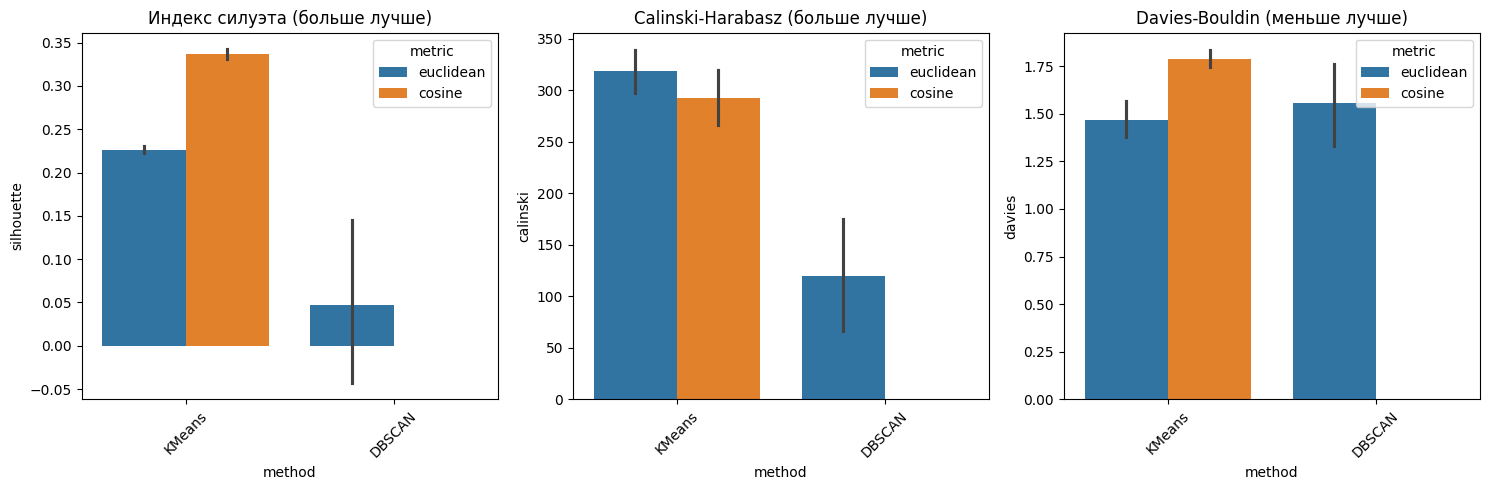

Лучший результат по силуэту:
silhouette       0.345025
calinski       276.773796
davies            1.79046
n_clusters              5
method             KMeans
metric             cosine
eps                   NaN
min_samples           NaN
Name: 5, dtype: object

Лучший результат по Calinski-Harabasz:
silhouette       0.220731
calinski       343.457178
davies           1.489413
n_clusters              4
method             KMeans
metric          euclidean
eps                   NaN
min_samples           NaN
Name: 2, dtype: object

Лучший результат по Davies-Bouldin:
silhouette     -0.048616
calinski       51.430869
davies          1.123881
n_clusters             7
method            DBSCAN
metric         euclidean
eps                  1.0
min_samples         15.0
Name: 20, dtype: object


In [148]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import cosine_distances
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Подготовка данных
X = actor_features[numeric_cols_actor]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Функция для оценки кластеризации
def evaluate_clustering(X, labels, metric_name='euclidean'):
    if len(np.unique(labels)) < 2:
        return {
            'silhouette': -1,
            'calinski': -1,
            'davies': float('inf'),
            'n_clusters': len(np.unique(labels))
        }
    
    return {
        'silhouette': silhouette_score(X, labels, metric=metric_name),
        'calinski': calinski_harabasz_score(X, labels),
        'davies': davies_bouldin_score(X, labels),
        'n_clusters': len(np.unique(labels))
    }

# 3. Тестирование KMeans (4-6 кластеров)
kmeans_results = []
for n_clusters in range(3, 7):
    # Евклидова метрика
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    res = evaluate_clustering(X_scaled, labels)
    res.update({'method': 'KMeans', 'metric': 'euclidean', 'n_clusters': n_clusters})
    kmeans_results.append(res)
    
    # Косинусная метрика
    cos_dist = cosine_distances(X_scaled)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(cos_dist)
    res = evaluate_clustering(X_scaled, labels, 'cosine')
    res.update({'method': 'KMeans', 'metric': 'cosine', 'n_clusters': n_clusters})
    kmeans_results.append(res)

# 4. Тестирование DBSCAN
dbscan_results = []
eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 10, 15, 25]

for eps in eps_values:
    for min_samples in min_samples_values:
        # Евклидова метрика
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        labels = dbscan.fit_predict(X_scaled)
        res = evaluate_clustering(X_scaled, labels)
        res.update({'method': 'DBSCAN', 'metric': 'euclidean', 'eps': eps, 'min_samples': min_samples})
        dbscan_results.append(res)
        
        # Косинусная метрика
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine')
        labels = dbscan.fit_predict(X_scaled)
        res = evaluate_clustering(X_scaled, labels, 'cosine')
        res.update({'method': 'DBSCAN', 'metric': 'cosine', 'eps': eps, 'min_samples': min_samples})
        dbscan_results.append(res)

# 5. Сбор и анализ результатов
results_df = pd.DataFrame(kmeans_results + dbscan_results)

print("Результаты:")
print(results_df)
# Фильтрация результатов по количеству кластеров (4-6)
valid_results = results_df[results_df['n_clusters'].between(3, 7)]

# Визуализация
plt.figure(figsize=(15, 5))
metrics = ['silhouette', 'calinski', 'davies']
titles = ['Индекс силуэта (больше лучше)', 'Calinski-Harabasz (больше лучше)', 'Davies-Bouldin (меньше лучше)']

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='method', y=metric, hue='metric', data=valid_results)
    plt.title(titles[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

# 6. Выбор лучшей конфигурации
best_by_silhouette = valid_results.loc[valid_results['silhouette'].idxmax()]
print("Лучший результат по силуэту:")
print(best_by_silhouette)

best_by_calinski = valid_results.loc[valid_results['calinski'].idxmax()]
print("\nЛучший результат по Calinski-Harabasz:")
print(best_by_calinski)

best_by_davies = valid_results.loc[valid_results['davies'].idxmin()]
print("\nЛучший результат по Davies-Bouldin:")
print(best_by_davies)

In [58]:
kmeans = KMeans(n_clusters=3, random_state=38)
labels = kmeans.fit_predict(X_scaled)
actor_features['cluster'] = labels

In [149]:
cos_dist = cosine_distances(X_scaled)
kmeans = KMeans(n_clusters=5, random_state=38)
labels = kmeans.fit_predict(X_scaled)
actor_features['cluster'] = labels

In [150]:
# Примеры актеров из каждого кластера
for cl in actor_features['cluster'].unique():
    print(f"\nCluster {cl}:")
    print(actor_features[actor_features['cluster'] == cl].describe())
    print(actor_features[actor_features['cluster'] == cl].sort_values('lead_budget_mean', ascending=False)['actor_name'].head(3))


Cluster 2:
       lead_budget_mean  lead_revenue_mean  lead_popularity_mean  \
count             662.0              662.0                 662.0   
mean    39842909.017265   106483344.061049             11.951855   
std     32345664.476118   122488365.816938             13.445906   
min                 1.0                8.0              1.500013   
25%          16982500.0       32967299.125              7.811379   
50%          32250000.0    67909766.166667              9.899713   
75%     53778571.464286   124991950.333333             12.368859   
max         260000000.0        875457937.0            213.849907   

       lead_vote_average_mean  lead_order_count  lead_profitable_movies  \
count              662.000000        662.000000              662.000000   
mean                 6.094499          2.972810                1.129909   
std                  0.621561          2.072626                1.164807   
min                  3.450000          1.000000                0.000000   


### Проверка кластеризации

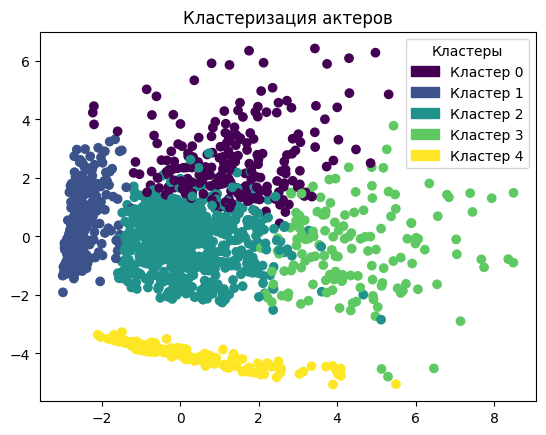

In [151]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Рисуем scatter plot
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=actor_features['cluster'], cmap='viridis')
plt.title('Кластеризация актеров')

# Получаем уникальные кластеры
clusters = np.unique(actor_features['cluster'])

# Создаём легенду вручную
handles = [
    mpatches.Patch(color=scatter.cmap(scatter.norm(cluster)), label=f'Кластер {cluster}')
    for cluster in clusters
]

plt.legend(handles=handles, title='Кластеры')
plt.show()

In [61]:
for cl in actor_features['cluster'].unique():
    actor_features[actor_features['cluster'] == cl].describe().to_csv(f"cl_{cl}.csv")

actor_features'cluster' = actor_features'cluster'.map({
    0: 'A',
    1: 'A',
    2: 'C'
})

In [152]:
actor_features['cluster'] = actor_features['cluster'].map({
    4: 'C',
    2: 'B',
    0: 'B',
    1: 'C',
    3: 'A',
})

actor_features.columns

Index(['actor_name', 'lead_budget_mean', 'lead_revenue_mean',
       'lead_popularity_mean', 'lead_vote_average_mean', 'lead_order_count',
       'lead_profitable_movies', 'lead_unprofitable_movies',
       'support_budget_mean', 'support_revenue_mean',
       'support_popularity_mean', 'support_vote_average_mean',
       'support_order_count', 'support_profitable_movies',
       'support_unprofitable_movies', 'total_movies', 'pct_lead_roles',
       'pct_support_roles', 'lead_success_ratio', 'support_success_ratio',
       'cluster'],
      dtype='object')

### Добавление категории актера

In [153]:
actor_category = actor_features[['actor_name', 'cluster']]
df_full_actor = df_full_actor.merge(actor_category, 
                                    on='actor_name',
                                    how='left')
df_full_actor['cluster'].isna().sum()

np.int64(52689)

In [154]:
df_full_actor.columns

Index(['actor_name', 'movie_id', 'order', 'budget', 'genres',
       'original_language', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'title', 'vote_average',
       'vote_count', 'release_year', 'release_week', 'profit', 'is_Comedy',
       'is_Thriller', 'is_Drama', 'genre_profit_class', 'is_high_genre_profit',
       'is_low_genre_profit', 'cluster'],
      dtype='object')

In [155]:
df_full_actor['cluster'].value_counts()

cluster
B    9985
C    4767
A    3156
Name: count, dtype: int64

In [156]:
df_full_actor[['actor_name', 'movie_id']].value_counts().head(10)

actor_name        movie_id
Jesse Camp        17130       4
Joe Jonas         18360       3
Gita Reddy        38167       3
Chaunty Spillane  43074       3
Kevin Jonas       18360       3
Nick Jonas        18360       3
Joe Jonas         329833      2
Dajine Colon      17130       2
Adam Long         374720      2
Esther Jun        24420       2
Name: count, dtype: int64

In [157]:
df_full_actor = df_full_actor[['actor_name', 'movie_id', 'order', 'cluster']].drop_duplicates()

In [158]:
pair_counts = df_full_actor[['actor_name', 'movie_id']].value_counts()

# Фильтруем только те пары, у которых меньше 4 появлений
rare_pairs = pair_counts[pair_counts >= 4].index

# Фильтруем основной DataFrame
filtered_df = df_full_actor.set_index(['actor_name', 'movie_id']).loc[rare_pairs].reset_index()

filtered_df.head(10)

,actor_name,movie_id,order,cluster
0,Jesse Camp,17130,22,NaN
1,Jesse Camp,17130,23,NaN
2,Jesse Camp,17130,24,NaN
3,Jesse Camp,17130,25,NaN


In [159]:
results_df = df_full_actor.groupby('movie_id').apply(
    lambda x: {
        'A_first': ((x['cluster'] == 'A') & (x['order'] < 3)).sum(),
        'B_first': ((x['cluster'] == 'B') & (x['order'] < 3)).sum(),
        'A_second': ((x['cluster'] == 'A') & (x['order'] > 2) & (x['order'] <= 5)).sum(),
        'B_second': ((x['cluster'] == 'B') & (x['order'] > 2) & (x['order'] <= 5)).sum(),
    }
).apply(pd.Series)

C:\Users\user\AppData\Local\Temp\ipykernel_28324\376119058.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results_df = df_full_actor.groupby('movie_id').apply(


In [160]:
results_df.head(15)

,A_first,B_first,A_second,B_second
movie_id,,,,
12,0,1,0,2
16,0,1,0,1
22,1,2,1,0
24,0,2,0,0
25,2,0,0,3
35,0,0,0,1
38,3,0,1,2
58,2,1,0,2
59,0,2,1,1


In [161]:
df_movies = df_movies.merge(
    results_df,
    left_on='id',
    right_on='movie_id',
    how='left'
)
df_movies.head()

,budget,genres,id,original_language,popularity,production_countries,release_date,revenue,runtime,title,...,is_Comedy,is_Thriller,is_Drama,genre_profit_class,is_high_genre_profit,is_low_genre_profit,A_first,B_first,A_second,B_second
0,11000000,[Comedy],10471,en,10.06545,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-01-12,59827328,98.0,Next Friday,...,True,False,False,unknown,False,False,1.0,1.0,0.0,2.0
1,90000000,"[Horror, Science Fiction, Thriller]",10384,en,5.496624,"[{'iso_3166_1': 'CH', 'name': 'Switzerland'}, ...",2000-01-14,14828081,91.0,Supernova,...,False,True,False,low,False,True,0.0,3.0,0.0,1.0
2,40000000,"[Horror, Mystery]",4234,en,9.738371,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-03,161834276,116.0,Scream 3,...,False,False,False,low,False,True,0.0,2.0,0.0,1.0
3,10000000,"[Action, Comedy, Romance, Thriller]",29076,en,6.370105,"[{'iso_3166_1': 'US', 'name': 'United States o...",2000-02-04,1631839,101.0,Gun Shy,...,True,True,False,high,True,False,2.0,1.0,0.0,0.0
4,40000000,"[Drama, Adventure, Romance, Thriller]",1907,en,14.430311,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-02-11,144056873,119.0,The Beach,...,False,True,True,high,True,False,0.0,1.0,0.0,0.0


## Задача регрессии

In [162]:
df_movies.columns

Index(['budget', 'genres', 'id', 'original_language', 'popularity',
       'production_countries', 'release_date', 'revenue', 'runtime', 'title',
       'vote_average', 'vote_count', 'release_year', 'release_week', 'profit',
       'is_Comedy', 'is_Thriller', 'is_Drama', 'genre_profit_class',
       'is_high_genre_profit', 'is_low_genre_profit', 'A_first', 'B_first',
       'A_second', 'B_second'],
      dtype='object')

### Первичный анализ данных

In [163]:
df_movies.isna().sum()

budget                  0
genres                  0
id                      0
original_language       0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
release_year            0
release_week            0
profit                  0
is_Comedy               0
is_Thriller             0
is_Drama                0
genre_profit_class      0
is_high_genre_profit    0
is_low_genre_profit     0
A_first                 2
B_first                 2
A_second                2
B_second                2
dtype: int64

In [164]:
numeric_columns = ['revenue', 'budget', 'profit', 'runtime', 'vote_average', 'vote_count', 'release_year', 'release_week', 'A_first', 'B_first', 'A_second', 'B_second']
boolean_columns = ['is_Drama', 'is_Comedy', 'is_Thriller', 'is_high_genre_profit', 'is_low_genre_profit']

In [165]:
df_movies[df_movies['A_first'].isna()][['title', 'A_first', 'B_first', 'A_second', 'B_second']].head(10)

,title,A_first,B_first,A_second,B_second
322,Naqoyqatsi,NaN,NaN,NaN,NaN
555,Yu-Gi-Oh! The Movie,NaN,NaN,NaN,NaN


In [166]:
df_movies = df_movies.dropna(subset=['title', 'A_first', 'B_first', 'A_second', 'B_second'])

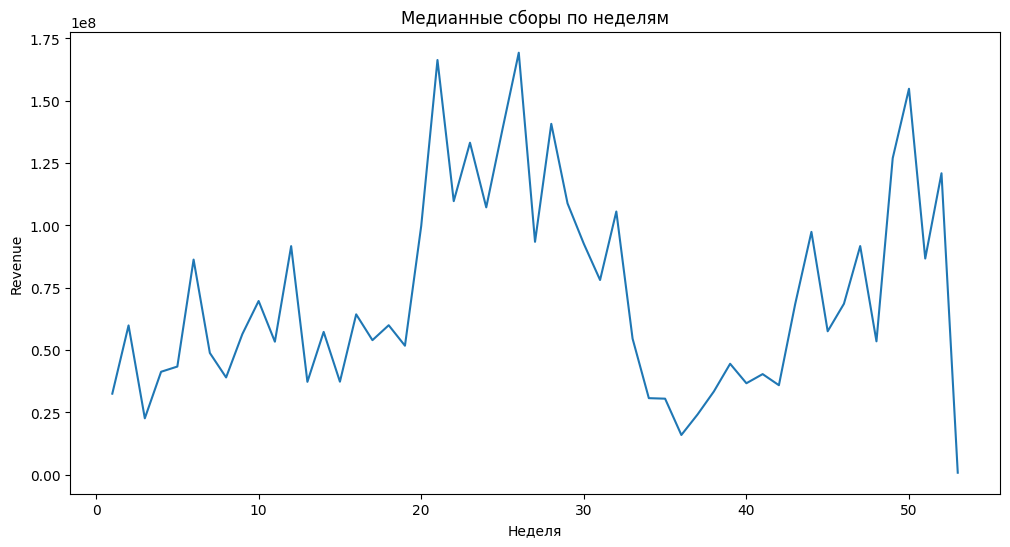

release_week
26    169245553.0
21    166324466.0
50    154777790.0
28    140705322.0
25    138598848.0
23    133134373.5
49    126947000.5
52    120873621.5
22    109682142.0
29    108782847.0
Name: revenue, dtype: Float64


In [167]:
plt.figure(figsize=(12, 6))
df_movies.groupby('release_week')['revenue'].median().plot()
plt.title('Медианные сборы по неделям')
plt.xlabel('Неделя')
plt.ylabel('Revenue')
plt.show()

print(df_movies.groupby('release_week')['revenue'].median().nlargest(10))

Как можно увидет есть пики в летние месяца и временем перед рождеством. Значит там больше всего выпускаются блокбастеры или фильмы для всех семьи, которые прибыльные. 

In [168]:
df_movies['is_summer'] = df_movies['release_week'].between(25, 30).astype(int)
df_movies['is_Xmas'] = df_movies['release_week'].between(47, 53).astype(int)

boolean_columns.extend(['is_summer', 'is_Xmas'])

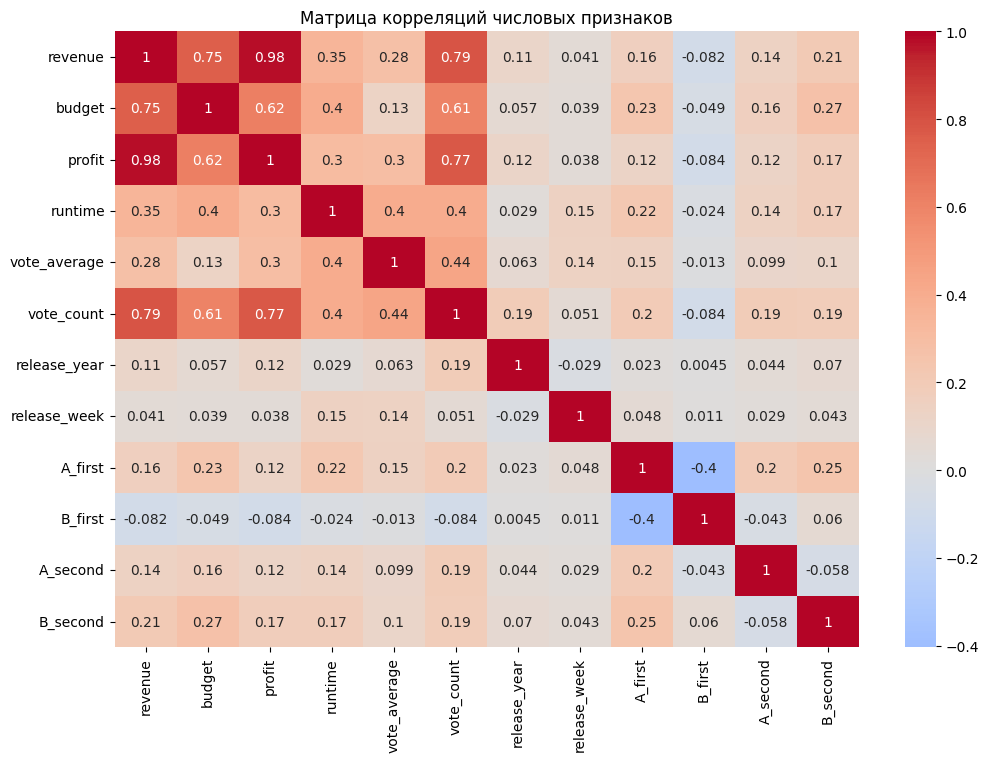

In [169]:
corr_matrix = df_movies[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций числовых признаков')
plt.show()

Сборы фильмов(`revenue`): 
- Сильно коррелируют с бюджетом (0.75)
- Количеством оценок, значит прибыльные фильмы популярны.
- Немного коррелирует с количество актеров первой и второй величины на первых и вторых ролях(`A_first`, `A_second`, `B_second`). Но они чуть больше коррелируют с бюджетом. 
- Средняя оценка слабо коррелирует с бюджетом, что может говорить, что и плохооценненые фильмы могу давать хорошую прибыль, так и хорошооценненые - плохую.


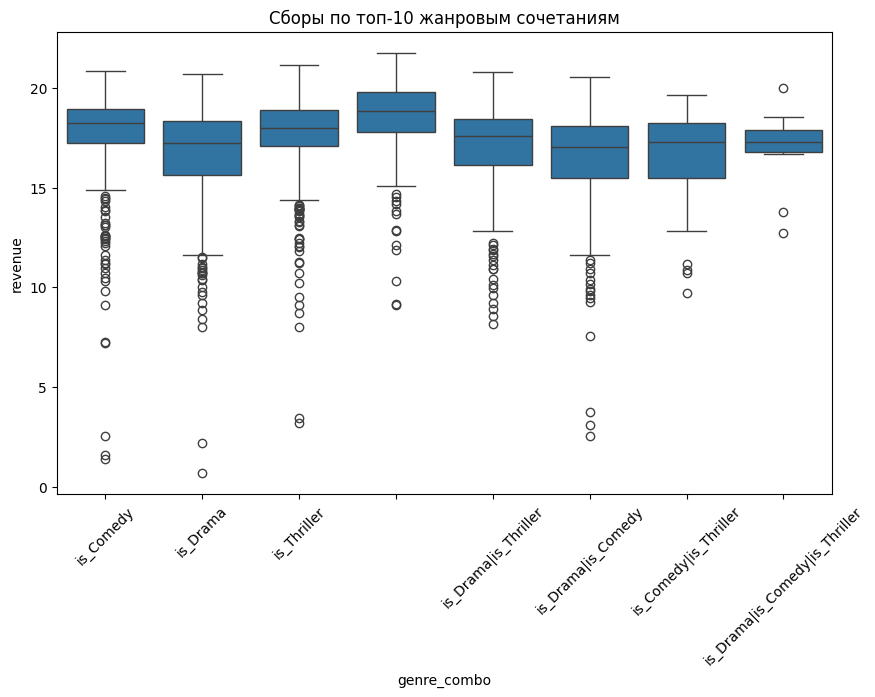

In [171]:
genre_cols = ['is_Drama', 'is_Comedy', 'is_Thriller']
genre_combinations = df_movies[genre_cols].apply(lambda x: '|'.join(x.index[x==1]), axis=1)
df_movies['genre_combo'] = genre_combinations

top_combos = genre_combinations.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=df_movies[df_movies['genre_combo'].isin(top_combos.index)]['genre_combo'], 
    y=np.log1p(df_movies['revenue']),
    order=top_combos.index
)
plt.xticks(rotation=45)
plt.title('Сборы по топ-10 жанровым сочетаниям')
plt.show()

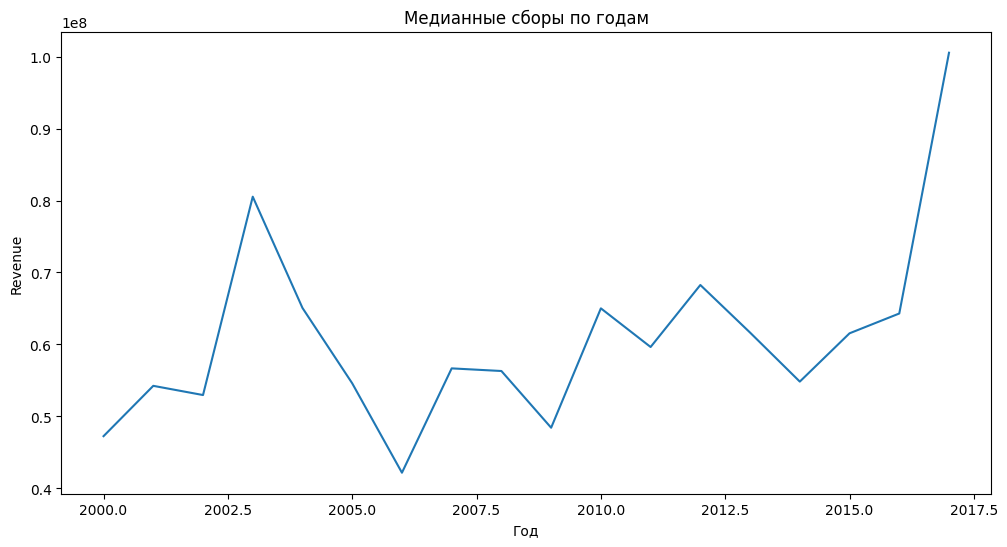

In [172]:
plt.figure(figsize=(12, 6))
df_movies.groupby('release_year')['revenue'].median().plot()
plt.title('Медианные сборы по годам')
plt.xlabel('Год')
plt.ylabel('Revenue')
plt.show()

Роста медианных сборов по годам нет.

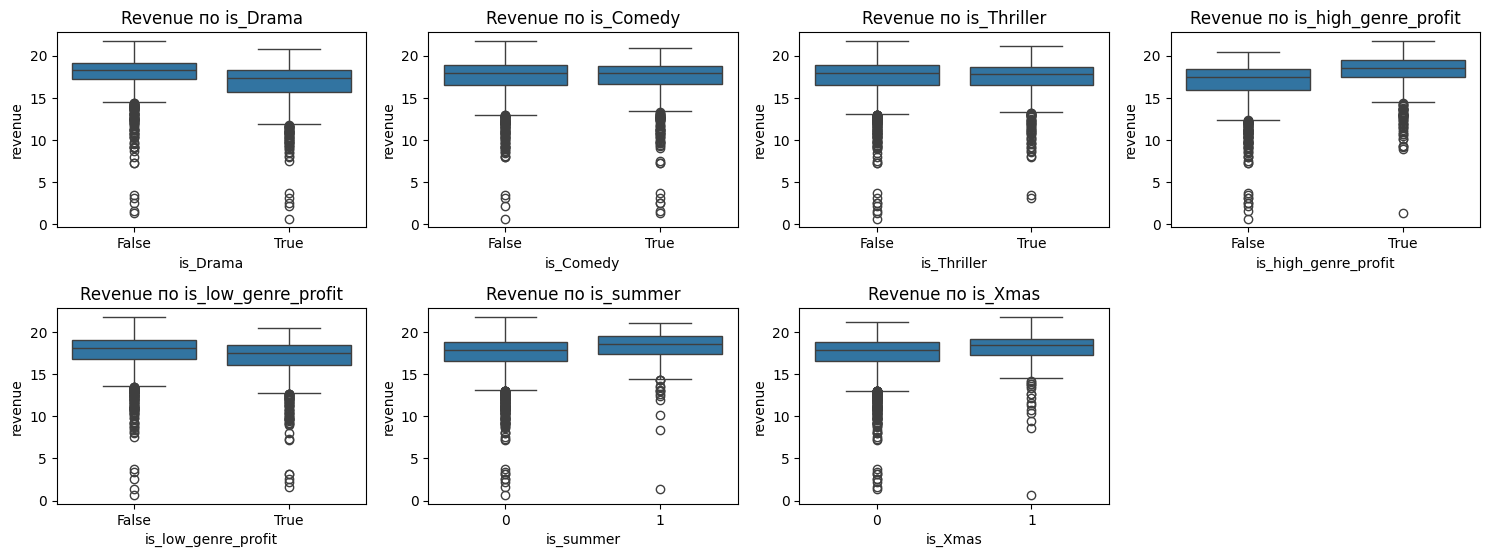

is_Drama: p-value = 1.0000 
is_Comedy: p-value = 0.6688 
is_Thriller: p-value = 0.9866 
is_high_genre_profit: p-value = 0.0000 ***
is_low_genre_profit: p-value = 1.0000 
is_summer: p-value = 0.0000 ***
is_Xmas: p-value = 0.0000 ***


In [173]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(boolean_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=col, y=np.log1p(df_movies['revenue']), data=df_movies)
    plt.title(f'Revenue по {col}')
plt.tight_layout()
plt.show()

# Статистический тест
from scipy.stats import mannwhitneyu

for col in boolean_columns:
    group1 = df_movies[df_movies[col] == 1]['revenue']
    group0 = df_movies[df_movies[col] == 0]['revenue']
    _, p = mannwhitneyu(group1, group0, alternative='greater')
    print(f"{col}: p-value = {p:.4f} {'***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else ''}")

Доказали, что такие фильмы выпущенные летом, перед рождеством и в прибыльных жанрах дают прирост прибыли относительно других фильмов.

А слабо прибыльные жанры и драма наоборот уступают в прибыли другим фильмам. 

In [174]:
import datetime as dt
df_movies['years_since_release'] = 2017 - df_movies['release_year']

In [175]:
numeric_columns.remove('release_year')
numeric_columns.remove('release_week')

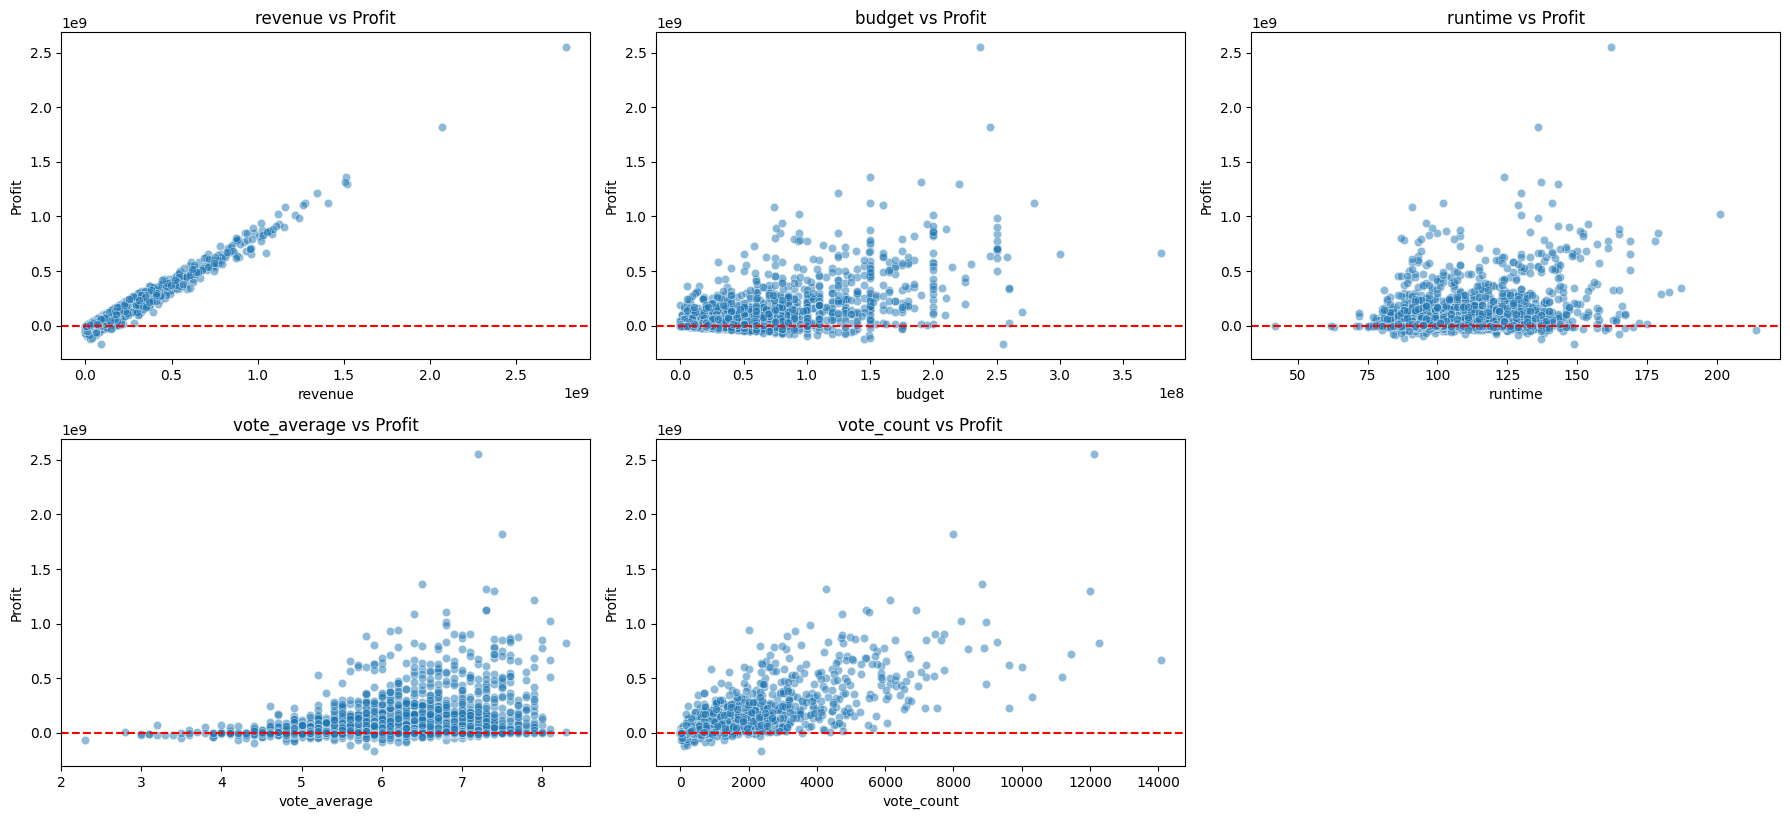

In [ ]:
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate([c for c in numeric_columns if c not in ['profit', 'A_first', 'B_first', 'A_second', 'B_second']]):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(x=df_movies[col], y=df_movies['profit'], alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')  
    plt.title(f'{col} vs Profit')
    plt.xlabel(col)
    plt.ylabel('Profit')

plt.tight_layout()
plt.show()

1. budget
- Связь слабее и более размытая.
- Есть немало фильмов с высоким бюджетом и отрицательной прибылью.
- Однако фильмы с очень высокой прибылью почти всегда имели солидный бюджет.

**Вывод:** высокий бюджет не гарантирует успеха, но без него сложно получить мегаприбыль.

2. runtime
- Слабая положительная зависимость: более длинные фильмы чаще зарабатывают больше.
- Почти все продолжительности фильмов имеют фильмы с отрицательной прибылью.
- Более безопасная длина фильма — около 140-160 минут.
- Однако множество высокодоходных фильмов находятся в диапазоне 90–120 минут — стандартный хронометраж.

3. vote_average
- Общая тенденция: фильмы с рейтингом >6 чаще собирают выше среднего, но прямой линейной зависимости нет.
- Есть успешные фильмы и с низкими оценками, но они — редкие исключения.
- Интерпретация: хороший зрительский отклик (оценки) повышает шансы на высокие сборы, а высокий гарантируюет как минимум выйти в ноль.

4. vote_count
- Более сильная зависимость, чем у среднего рейтинга.
- Фильмы с большим числом голосов, как правило, прибыльны.


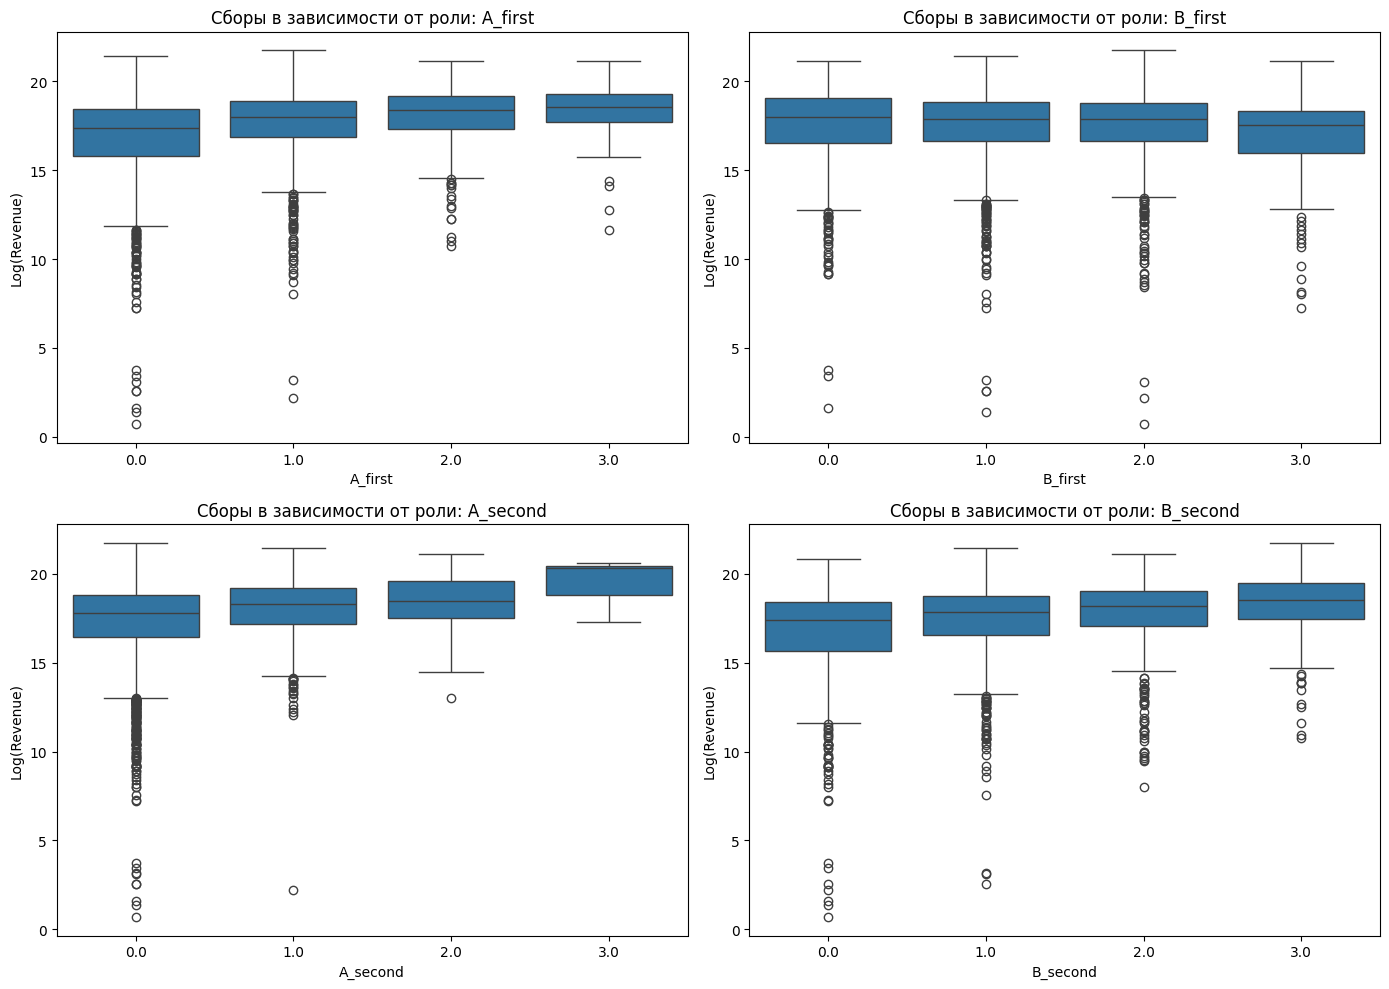

In [178]:
roles_columns = ['A_first', 'B_first', 'A_second', 'B_second']
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, col in enumerate(roles_columns):
    sns.boxplot(x=df_movies[col], y=np.log1p(df_movies['revenue']), ax=axs[i])
    axs[i].set_title(f'Сборы в зависимости от роли: {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Log(Revenue)')

plt.tight_layout()
plt.show()

- Актеры категории B не подходят для первых ролей.
- Сильный каст на второстепенных ролях дает хорошую прибыль

### Построенние моделей

In [179]:
numeric_columns

['revenue',
 'budget',
 'profit',
 'runtime',
 'vote_average',
 'vote_count',
 'A_first',
 'B_first',
 'A_second',
 'B_second']

In [182]:
boolean_columns

['is_Drama',
 'is_Comedy',
 'is_Thriller',
 'is_high_genre_profit',
 'is_low_genre_profit',
 'is_summer',
 'is_Xmas']

In [183]:
X_columns = numeric_columns + boolean_columns + ['years_since_release']
for col in ['revenue', 'profit', 'release_week', 'release_year']:
    if col in X_columns:
        X_columns.remove(col)

In [184]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [185]:
X = df_movies[X_columns]
y = df_movies['revenue']

In [186]:
df_movies[X_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2579 entries, 0 to 2580
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                2579 non-null   Int64  
 1   runtime               2579 non-null   float64
 2   vote_average          2579 non-null   float64
 3   vote_count            2579 non-null   Int64  
 4   A_first               2579 non-null   float64
 5   B_first               2579 non-null   float64
 6   A_second              2579 non-null   float64
 7   B_second              2579 non-null   float64
 8   is_Drama              2579 non-null   bool   
 9   is_Comedy             2579 non-null   bool   
 10  is_Thriller           2579 non-null   bool   
 11  is_high_genre_profit  2579 non-null   bool   
 12  is_low_genre_profit   2579 non-null   bool   
 13  is_summer             2579 non-null   int64  
 14  is_Xmas               2579 non-null   int64  
 15  years_since_release   2579

In [187]:
df_movies = df_movies.fillna(0)

bool_columns = ['is_Drama', 'is_Comedy', 'is_Thriller', 'is_high_genre_profit', 'is_low_genre_profit']
df_movies[bool_columns] = df_movies[bool_columns].astype(int)


In [188]:
df_movies.isna().sum()

budget                  0
genres                  0
id                      0
original_language       0
popularity              0
production_countries    0
release_date            0
revenue                 0
runtime                 0
title                   0
vote_average            0
vote_count              0
release_year            0
release_week            0
profit                  0
is_Comedy               0
is_Thriller             0
is_Drama                0
genre_profit_class      0
is_high_genre_profit    0
is_low_genre_profit     0
A_first                 0
B_first                 0
A_second                0
B_second                0
is_summer               0
is_Xmas                 0
genre_combo             0
years_since_release     0
dtype: int64

In [ ]:
df_movies[(df_movies['budget'] == -1) | (df_movies['revenue'] == )]

,budget,genres,id,original_language,popularity,production_countries,release_date,revenue,runtime,title,...,is_high_genre_profit,is_low_genre_profit,A_first,B_first,A_second,B_second,is_summer,is_Xmas,genre_combo,years_since_release


In [189]:
df_movies['revenue'].info()

<class 'pandas.core.series.Series'>
Index: 2579 entries, 0 to 2580
Series name: revenue
Non-Null Count  Dtype
--------------  -----
2579 non-null   Int64
dtypes: Int64(1)
memory usage: 42.8 KB


In [190]:
def adversarial_validation(X_train, X_test, n_folds=5, random_state=42):
    """
    Функция для проведения adversarial validation между тренировочным и тестовым набором данных.

    Параметры:
    X_train - тренировочный набор данных (pandas DataFrame или Series)
    X_test - тестовый набор данных (pandas DataFrame или Series)
    n_folds - количество фолдов для кросс-валидации
    random_state - фиксированное значение для воспроизводимости результатов

    Возвращает:
    mean_auc - среднее значение ROC AUC
    feature_importance - важность признаков
    """

    # Проверяем типы входных данных и преобразуем Series в DataFrame при необходимости
    if isinstance(X_train, pd.Series):
        X_train = X_train.to_frame()

    if isinstance(X_test, pd.Series):
        X_test = X_test.to_frame()

    # Проверяем, что входные данные являются pandas DataFrame
    if not isinstance(X_train, pd.DataFrame) or not isinstance(X_test, pd.DataFrame):
        raise TypeError("X_train и X_test должны быть pandas DataFrame или Series")

    # Проверяем, что все колонки имеют имена
    if any(not isinstance(col, str) for col in X_train.columns) or any(not isinstance(col, str) for col in X_test.columns):
        raise ValueError("Все колонки в X_train и X_test должны иметь строковые имена")

    # Проверяем, что наборы данных имеют одинаковые колонки
    if set(X_train.columns) != set(X_test.columns):
        raise ValueError("Колонки в тренировочном и тестовом наборах должны совпадать")

    # Создаем новый целевой признак: 0 для тренировочных данных, 1 для тестовых
    X_train_labeled = X_train.copy()
    X_test_labeled = X_test.copy()

    X_train_labeled['is_test'] = 0
    X_test_labeled['is_test'] = 1

    # Объединяем данные в один датасет
    combined_data = pd.concat([X_train_labeled, X_test_labeled], axis=0)

    # Перемешиваем данные
    combined_data = combined_data.sample(frac=1, random_state=random_state).reset_index(drop=True)

    # Выделяем признаки и целевую переменную
    X = combined_data.drop('is_test', axis=1)
    y = combined_data['is_test']

    # Проверяем, что все колонки в X содержат числовые данные
    non_numeric_cols = [col for col in X.columns if not np.issubdtype(X[col].dtype, np.number)]
    if non_numeric_cols:
        raise ValueError(f"Следующие колонки содержат нечисловые данные: {non_numeric_cols}. "
                         f"Преобразуйте их в числовой формат перед использованием.")

    # Инициализируем модель XGBoost
    model = XGBClassifier(
        max_depth=3,
        learning_rate=0.1,
        n_estimators=100,
        objective='binary:logistic',
        random_state=random_state
    )

    # Инициализируем кросс-валидацию
    cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_state)

    # Списки для хранения результатов
    auc_scores = []
    y_true_all = []
    y_pred_all = []

    # Проводим кросс-валидацию
    for i, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]

        # Обучаем модель
        model.fit(X_fold_train, y_fold_train)

        # Получаем предсказания вероятностей
        y_pred = model.predict_proba(X_fold_val)[:, 1]

        # Вычисляем ROC AUC
        auc = roc_auc_score(y_fold_val, y_pred)
        auc_scores.append(auc)

        # Сохраняем результаты для построения общей ROC-кривой
        y_true_all.extend(y_fold_val)
        y_pred_all.extend(y_pred)

        print(f"Фолд {i+1}: ROC AUC = {auc:.4f}")

    # Вычисляем среднее значение ROC AUC
    mean_auc = np.mean(auc_scores)
    print(f"\nСреднее значение ROC AUC: {mean_auc:.4f}")

    # Обучаем модель на всех данных для получения важности признаков
    final_model = XGBClassifier(
        max_depth=3,
        learning_rate=0.1,
        n_estimators=100,
        objective='binary:logistic',
        random_state=random_state
    )
    final_model.fit(X, y)

    # Получаем важность признаков
    feature_importance = pd.DataFrame({
        'Признак': X.columns,
        'Важность': final_model.feature_importances_
    }).sort_values('Важность', ascending=False)

    # Строим ROC-кривую
    fpr, tpr, _ = roc_curve(y_true_all, y_pred_all)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC кривая (AUC = {mean_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Случайное угадывание')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая для Adversarial Validation')
    plt.legend()
    plt.grid(True)

    # Выводим топ-10 важных признаков
    plt.figure(figsize=(12, 6))
    top_features = feature_importance.head(min(10, len(feature_importance)))
    plt.barh(top_features['Признак'], top_features['Важность'])
    plt.xlabel('Важность')
    plt.ylabel('Признак')
    plt.title('Топ-10 признаков по важности')
    plt.gca().invert_yaxis()  # Инвертируем ось Y для отображения самых важных признаков сверху

    return mean_auc, feature_importance

In [207]:
X_train, X_test, y_train, y_test = train_test_split(
    df_movies[X_columns],
    np.log1p(df_movies['revenue']),
    test_size=0.25,
    random_state=42,
)

X_train['budget'] = np.log1p(X_train['budget'])
X_test['budget'] = np.log1p(X_test['budget'])

In [208]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1934 entries, 2566 to 862
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1934 non-null   float64
 1   runtime               1934 non-null   float64
 2   vote_average          1934 non-null   float64
 3   vote_count            1934 non-null   int64  
 4   A_first               1934 non-null   float64
 5   B_first               1934 non-null   float64
 6   A_second              1934 non-null   float64
 7   B_second              1934 non-null   float64
 8   is_Drama              1934 non-null   int64  
 9   is_Comedy             1934 non-null   int64  
 10  is_Thriller           1934 non-null   int64  
 11  is_high_genre_profit  1934 non-null   int64  
 12  is_low_genre_profit   1934 non-null   int64  
 13  is_summer             1934 non-null   int64  
 14  is_Xmas               1934 non-null   int64  
 15  years_since_release   19

Фолд 1: ROC AUC = 0.4853
Фолд 2: ROC AUC = 0.4861
Фолд 3: ROC AUC = 0.4871
Фолд 4: ROC AUC = 0.4689
Фолд 5: ROC AUC = 0.4398

Среднее значение ROC AUC: 0.4734


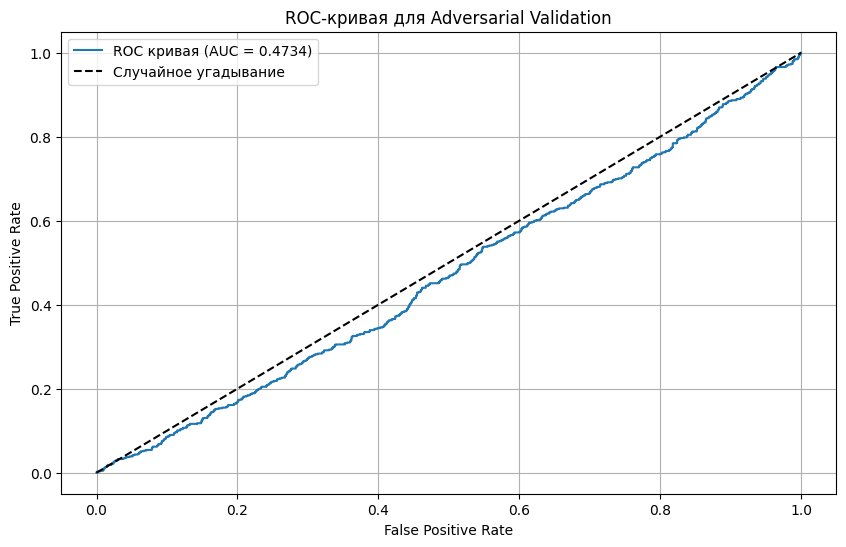

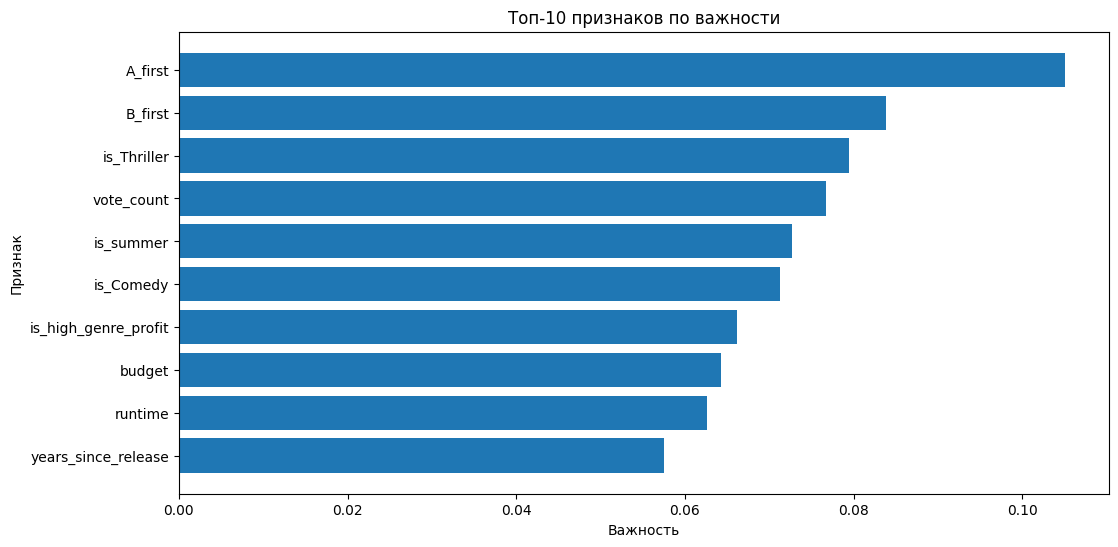

In [209]:
mean_auc, feature_importance = adversarial_validation(X_train, X_test)

AUC = 0.4734, что близко к 0.5 — это говорит о том, что модель не способна отличить тренировочную выборку от тестовой.

Следовательно, распределения признаков в обеих выборках очень похожи, и overfitting/shift между train и test практически отсутствует.

Это значит, что:

- Метрики качества на кросс-валидации можно считать надёжными.

- Можно не беспокоиться о переобучении на train.

- Разбиение на train/test было корректным, и тестовая выборка адекватно представляет реальное распределение данных.

In [213]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm
import xgboost as xgb

In [214]:
def visualize_residuals(y_true, y_pred, dataset_name=""):
    """
    Функция для визуализации остатков регрессионной модели

    Параметры:
    y_true - истинные значения целевой переменной
    y_pred - предсказанные значения
    dataset_name - название набора данных для заголовков графиков
    """
    # Вычисляем остатки
    residuals = y_true - y_pred

    # Создаем фигуру с подграфиками
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Анализ остатков ({dataset_name})', fontsize=16)

    # 1. График остатков относительно предсказанных значений
    axes[0, 0].scatter(y_pred, residuals, alpha=0.5)
    axes[0, 0].axhline(y=0, color='r', linestyle='-')
    axes[0, 0].set_title('Остатки vs Предсказанные значения')
    axes[0, 0].set_xlabel('Предсказанные значения')
    axes[0, 0].set_ylabel('Остатки')
    axes[0, 0].grid(True)

    # 2. Гистограмма остатков
    axes[0, 1].hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 1].set_title('Гистограмма остатков')
    axes[0, 1].set_xlabel('Остатки')
    axes[0, 1].set_ylabel('Частота')
    axes[0, 1].grid(True)

    # 3. QQ-график для проверки нормальности остатков
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title('QQ-график остатков')
    axes[1, 0].grid(True)

    # 4. Предсказанные vs Истинные значения
    axes[1, 1].scatter(y_true, y_pred, alpha=0.5)
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    axes[1, 1].plot([min_val, max_val], [min_val, max_val], 'r--')
    axes[1, 1].set_title('Предсказанные vs Истинные значения')
    axes[1, 1].set_xlabel('Истинные значения')
    axes[1, 1].set_ylabel('Предсказанные значения')
    axes[1, 1].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Оставляем место для общего заголовка
    plt.show()

In [215]:
def cross_validation_with_residuals(
    X_train, y_train, X_test, y_test, X_oot=None, y_oot=None,
    model=None, n_folds=5, random_state=42
    ):
    """
    Функция для проведения кросс-валидации с отслеживанием MSE и визуализацией остатков

    Параметры:
    X_train - признаки обучающей выборки (pandas DataFrame)
    y_train - целевая переменная обучающей выборки (pandas Series или numpy array)
    X_test - признаки тестовой выборки (pandas DataFrame)
    y_test - целевая переменная тестовой выборки (pandas Series или numpy array)
    X_oot - признаки out-of-time выборки (pandas DataFrame), опционально
    y_oot - целевая переменная out-of-time выборки (pandas Series или numpy array), опционально
    model - модель машинного обучения (по умолчанию RandomForestRegressor)
    n_folds - количество фолдов для кросс-валидации
    random_state - фиксированное значение для воспроизводимости результатов

    Возвращает:
    cv_results - словарь с результатами кросс-валидации
    final_model - обученная модель на всех тренировочных данных
    """

    # Проверка входных данных
    if not isinstance(X_train, pd.DataFrame):
        raise TypeError("X_train должен быть pandas DataFrame")

    if not isinstance(X_test, pd.DataFrame):
        raise TypeError("X_test должен быть pandas DataFrame")

    if X_oot is not None and not isinstance(X_oot, pd.DataFrame):
        raise TypeError("X_oot должен быть pandas DataFrame")

    # Проверка, что все наборы данных имеют одинаковые колонки
    if not set(X_train.columns) == set(X_test.columns):
        raise ValueError("Колонки в X_train и X_test должны совпадать")

    if X_oot is not None and not set(X_train.columns) == set(X_oot.columns):
        raise ValueError("Колонки в X_train и X_oot должны совпадать")

    # Если модель не задана, используем RandomForestRegressor по умолчанию
    if model is None:
        model = RandomForestRegressor(n_estimators=100, random_state=random_state)

    # Инициализируем KFold для кросс-валидации
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)

    # Словарь для хранения результатов
    cv_results = {
        'train_predictions': np.zeros(len(y_train)),
        'train_actual': y_train,
        'test_predictions': None,
        'test_actual': y_test,
        'oot_predictions': None,
        'oot_actual': y_oot if y_oot is not None else None,
        'fold_mse': [],
        'train_mse': 0,
        'test_mse': 0,
        'oot_mse': 0 if y_oot is not None else None
    }

    # Массивы для хранения предсказаний и истинных значений по фолдам
    fold_train_mse = []
    fold_val_mse = []

    print("Начинаем процесс кросс-валидации...")

    # Проходим по всем фолдам
    for fold, (train_idx, val_idx) in enumerate(tqdm(kf.split(X_train), total=n_folds, desc="Фолды")):
        # Разделяем данные на обучающую и валидационную выборки
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx] if isinstance(y_train, pd.Series) else y_train[train_idx], \
                                  y_train.iloc[val_idx] if isinstance(y_train, pd.Series) else y_train[val_idx]

        # Обучаем модель
        model.fit(X_fold_train, y_fold_train)

        # Делаем предсказания на обучающей и валидационной выборках
        y_fold_train_pred = model.predict(X_fold_train)
        y_fold_val_pred = model.predict(X_fold_val)

        # Сохраняем предсказания для этого фолда
        cv_results['train_predictions'][val_idx] = y_fold_val_pred

        # Вычисляем MSE для этого фолда
        train_mse = mean_squared_error(y_fold_train, y_fold_train_pred)
        val_mse = mean_squared_error(y_fold_val, y_fold_val_pred)

        fold_train_mse.append(train_mse)
        fold_val_mse.append(val_mse)
        cv_results['fold_mse'].append(val_mse)

        print(f"Фолд {fold+1}/{n_folds}:")
        print(f"  MSE на обучающей выборке: {train_mse:.4f}")
        print(f"  MSE на валидационной выборке: {val_mse:.4f}")

    # Вычисляем средние значения MSE
    cv_results['train_mse'] = np.mean(fold_train_mse)
    cv_results['val_mse'] = np.mean(fold_val_mse)

    print(f"\nСредняя MSE на обучающей выборке: {cv_results['train_mse']:.4f}")
    print(f"Средняя MSE на валидационной выборке: {cv_results['val_mse']:.4f}")

    # Обучаем финальную модель на всех тренировочных данных
    print("\nОбучаем финальную модель на всех тренировочных данных...")
    final_model = model.fit(X_train, y_train)

    # Делаем предсказания на тестовой выборке
    cv_results['test_predictions'] = final_model.predict(X_test)

    # Вычисляем MSE на тестовой выборке
    cv_results['test_mse'] = mean_squared_error(y_test, cv_results['test_predictions'])
    print(f"MSE на тестовой выборке: {cv_results['test_mse']:.4f}")

    # Если есть OOT данные, делаем предсказания на них
    if X_oot is not None and y_oot is not None:
        cv_results['oot_predictions'] = final_model.predict(X_oot)
        cv_results['oot_mse'] = mean_squared_error(y_oot, cv_results['oot_predictions'])
        print(f"MSE на OOT выборке: {cv_results['oot_mse']:.4f}")

    # Визуализация результатов
    visualize_cv_results(cv_results, n_folds)

    # Визуализация остатков
    visualize_residuals(y_test, cv_results['test_predictions'], "Тестовая выборка")

    # Если есть OOT данные, визуализируем остатки для них
    if X_oot is not None and y_oot is not None:
        visualize_residuals(y_oot, cv_results['oot_predictions'], "OOT выборка")

    return cv_results, final_model

def visualize_cv_results(cv_results, n_folds):
    """
    Функция для визуализации результатов кросс-валидации

    Параметры:
    cv_results - словарь с результатами кросс-валидации
    n_folds - количество фолдов
    """
    # Настраиваем стиль графиков
    sns.set(style="whitegrid")

    # 1. График MSE по фолдам
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, n_folds+1), cv_results['fold_mse'], color='skyblue')
    plt.axhline(y=np.mean(cv_results['fold_mse']), color='r', linestyle='-',
               label=f'Среднее: {np.mean(cv_results["fold_mse"]):.4f}')
    plt.title('MSE по фолдам')
    plt.xlabel('Номер фолда')
    plt.ylabel('MSE')
    plt.xticks(range(1, n_folds+1))
    plt.legend()
    plt.grid(True)
    plt.show()

    # 2. Сравнение предсказаний и реальных значений на тренировочных данных
    plt.figure(figsize=(10, 6))
    plt.scatter(cv_results['train_actual'], cv_results['train_predictions'], alpha=0.5)
    min_val = min(min(cv_results['train_actual']), min(cv_results['train_predictions']))
    max_val = max(max(cv_results['train_actual']), max(cv_results['train_predictions']))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    plt.title('Предсказания vs Реальные значения (Тренировочные данные)')
    plt.xlabel('Реальные значения')
    plt.ylabel('Предсказания')
    plt.grid(True)
    plt.show()

    # 3. Сравнение предсказаний и реальных значений на тестовых данных
    plt.figure(figsize=(10, 6))
    plt.scatter(cv_results['test_actual'], cv_results['test_predictions'], alpha=0.5)
    min_val = min(min(cv_results['test_actual']), min(cv_results['test_predictions']))
    max_val = max(max(cv_results['test_actual']), max(cv_results['test_predictions']))
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')
    plt.title('Предсказания vs Реальные значения (Тестовые данные)')
    plt.xlabel('Реальные значения')
    plt.ylabel('Предсказания')
    plt.grid(True)
    plt.show()

    # 4. Если есть OOT данные, визуализируем их
    if cv_results['oot_predictions'] is not None:
        plt.figure(figsize=(10, 6))
        plt.scatter(cv_results['oot_actual'], cv_results['oot_predictions'], alpha=0.5)
        min_val = min(min(cv_results['oot_actual']), min(cv_results['oot_predictions']))
        max_val = max(max(cv_results['oot_actual']), max(cv_results['oot_predictions']))
        plt.plot([min_val, max_val], [min_val, max_val], 'r--')
        plt.title('Предсказания vs Реальные значения (OOT данные)')
        plt.xlabel('Реальные значения')
        plt.ylabel('Предсказания')
        plt.grid(True)
        plt.show()

    # 5. Сравнение MSE на разных наборах данных
    plt.figure(figsize=(10, 6))

    # Собираем метрики для всех наборов данных
    datasets = ['Кросс-валидация', 'Тест']
    mse_values = [cv_results['val_mse'], cv_results['test_mse']]

    if cv_results['oot_mse'] is not None:
        datasets.append('OOT')
        mse_values.append(cv_results['oot_mse'])

    plt.bar(datasets, mse_values, color='skyblue')
    plt.title('Сравнение MSE на разных наборах данных')
    plt.ylabel('MSE')
    plt.grid(True)

    # Добавляем значения MSE над столбцами
    for i, v in enumerate(mse_values):
        plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

    plt.show()

In [216]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import warnings

def cross_validation_with_residuals_hyper(
    X_train, y_train, X_test, y_test, X_oot=None, y_oot=None,
    models_to_try='all', param_grids='default', n_folds=5, 
    random_state=42, search_method='random', n_iter=50,
    verbose=1
):
    """
    Улучшенная функция для проведения кросс-валидации с подбором гиперпараметров и модели
    
    Параметры:
    X_train - признаки обучающей выборки (pandas DataFrame)
    y_train - целевая переменная обучающей выборки (pandas Series или numpy array)
    X_test - признаки тестовой выборки (pandas DataFrame)
    y_test - целевая переменная тестовой выборки (pandas Series или numpy array)
    X_oot - признаки out-of-time выборки (pandas DataFrame), опционально
    y_oot - целевая переменная out-of-time выборки (pandas Series или numpy array), опционально
    models_to_try - какие модели тестировать ('all', 'default' или список моделей)
    param_grids - словарь с параметрами для поиска ('default' или пользовательский)
    n_folds - количество фолдов для кросс-валидации
    random_state - фиксированное значение для воспроизводимости результатов
    search_method - метод поиска гиперпараметров ('grid' или 'random')
    n_iter - количество итераций для RandomizedSearchCV
    verbose - уровень детализации (0, 1 или 2)
    
    Возвращает:
    cv_results - словарь с результатами кросс-валидации
    final_model - лучшая обученная модель на всех тренировочных данных
    best_model_name - название лучшей модели
    """
    
    # Проверка входных данных
    if not isinstance(X_train, pd.DataFrame):
        raise TypeError("X_train должен быть pandas DataFrame")
    
    if not isinstance(X_test, pd.DataFrame):
        raise TypeError("X_test должен быть pandas DataFrame")
    
    if X_oot is not None and not isinstance(X_oot, pd.DataFrame):
        raise TypeError("X_oot должен быть pandas DataFrame")
    
    # Проверка совпадения колонок
    if not set(X_train.columns) == set(X_test.columns):
        raise ValueError("Колонки в X_train и X_test должны совпадать")
    
    if X_oot is not None and not set(X_train.columns) == set(X_oot.columns):
        raise ValueError("Колонки в X_train и X_oot должны совпадать")
    
    # Определение моделей для тестирования
    if models_to_try == 'all':
        models = {
            'RandomForest': RandomForestRegressor(random_state=random_state),
            'XGBoost': XGBRegressor(random_state=random_state, verbosity=0),
            'LightGBM': LGBMRegressor(random_state=random_state),
            'Ridge': Ridge(random_state=random_state),
            'Lasso': Lasso(random_state=random_state)
        }
    elif models_to_try == 'default':
        models = {
            'RandomForest': RandomForestRegressor(random_state=random_state),
            'GradientBoosting': GradientBoostingRegressor(random_state=random_state),
            'XGBoost': XGBRegressor(random_state=random_state, verbosity=0),
        }
    elif isinstance(models_to_try, dict):
        models = models_to_try
    else:
        raise ValueError("models_to_try должен быть 'all', 'default' или словарь моделей")
    
    # Определение параметров для поиска
    if param_grids == 'default':
        param_grids = {
            'RandomForest': {
                'n_estimators': [100, 200, 300],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            },
            'XGBoost': {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5, 6],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0]
            },
            'LightGBM': {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'num_leaves': [31, 50, 100],
                'max_depth': [-1, 5, 10]
            },
            'Ridge': {
                'alpha': [0.1, 1.0, 10.0, 100.0]
            },
            'Lasso': {
                'alpha': [0.1, 1.0, 10.0, 100.0]
            },
            'SVR': {
                'C': [0.1, 1, 10],
                'kernel': ['linear', 'rbf'],
                'gamma': ['scale', 'auto']
            }
        }
    elif not isinstance(param_grids, dict):
        raise ValueError("param_grids должен быть 'default' или словарь параметров")
    
    # Убедимся, что для всех моделей есть параметры
    for model_name in models:
        if model_name not in param_grids:
            warnings.warn(f"Нет параметров для модели {model_name}, будут использованы параметры по умолчанию")
            param_grids[model_name] = {}
    
    # Результаты по всем моделям
    all_models_results = {}
    
    
    # Перебираем все модели
    for model_name, model in models.items():
        if verbose >= 1:
            print(f"\n{'='*50}")
            print(f"Начинаем подбор параметров для модели: {model_name}")
            print(f"{'='*50}")
        
        # Выбираем метод поиска
        if search_method == 'grid':
            search = GridSearchCV(
                estimator=model,
                param_grid=param_grids[model_name],
                cv=n_folds,
                scoring='neg_mean_squared_error',
                n_jobs=-1,
                verbose=verbose
            )
        elif search_method == 'random':
            search = RandomizedSearchCV(
                estimator=model,
                param_distributions=param_grids[model_name],
                n_iter=n_iter,
                cv=n_folds,
                scoring='neg_mean_squared_error',
                random_state=random_state,
                n_jobs=-1,
                verbose=verbose
            )
        else:
            raise ValueError("search_method должен быть 'grid' или 'random'")
        
        # Выполняем поиск
        search.fit(X_train, y_train)
        
        # Сохраняем результаты
        all_models_results[model_name] = {
            'best_model': search.best_estimator_,
            'best_params': search.best_params_,
            'best_score': -search.best_score_,  # преобразуем обратно в MSE
            'cv_results': search.cv_results_
        }
        
        if verbose >= 1:
            print(f"\nЛучшие параметры для {model_name}: {search.best_params_}")
            print(f"Лучший MSE (CV): {all_models_results[model_name]['best_score']:.4f}")
    
    # Выбираем лучшую модель
    best_model_name = min(all_models_results, key=lambda x: all_models_results[x]['best_score'])
    best_model = all_models_results[best_model_name]['best_model']
    best_score = all_models_results[best_model_name]['best_score']
    
    if verbose >= 1:
        print(f"\n{'='*50}")
        print(f"Лучшая модель: {best_model_name} с MSE {best_score:.4f}")
        print(f"{'='*50}")
    
    # Обучаем лучшую модель на всех данных
    final_model = best_model.fit(X_train, y_train)
    
    # Подготовка результатов
    cv_results = {
        'all_models_results': all_models_results,
        'best_model_name': best_model_name,
        'best_model': best_model,
        'best_score': best_score,
        'train_predictions': final_model.predict(X_train),
        'train_actual': y_train,
        'test_predictions': final_model.predict(X_test),
        'test_actual': y_test,
        'train_mse': mean_squared_error(y_train, final_model.predict(X_train)),
        'test_mse': mean_squared_error(y_test, final_model.predict(X_test))
    }
    
    # Если есть OOT данные
    if X_oot is not None and y_oot is not None:
        cv_results.update({
            'oot_predictions': final_model.predict(X_oot),
            'oot_actual': y_oot,
            'oot_mse': mean_squared_error(y_oot, final_model.predict(X_oot))
        })
    
    if verbose >= 1:
        print(f"\nРезультаты на полном обучении:")
        print(f"MSE на обучающей выборке: {cv_results['train_mse']:.4f}")
        print(f"MSE на тестовой выборке: {cv_results['test_mse']:.4f}")
        if X_oot is not None and y_oot is not None:
            print(f"MSE на OOT выборке: {cv_results['oot_mse']:.4f}")
    
    # Визуализация результатов
    # visualize_cv_results(cv_results, n_folds)
    visualize_residuals(y_test, cv_results['test_predictions'], "Тестовая выборка")
    if X_oot is not None and y_oot is not None:
        visualize_residuals(y_oot, cv_results['oot_predictions'], "OOT выборка")
    
    return cv_results, final_model, best_model_name

C:\Users\user\AppData\Local\Temp\ipykernel_28324\2555810738.py:118: UserWarning: Нет параметров для модели LightGBM, будут использованы параметры по умолчанию
  warnings.warn(f"Нет параметров для модели {model_name}, будут использованы параметры по умолчанию")
C:\Users\user\AppData\Local\Temp\ipykernel_28324\2555810738.py:118: UserWarning: Нет параметров для модели Lasso, будут использованы параметры по умолчанию
  warnings.warn(f"Нет параметров для модели {model_name}, будут использованы параметры по умолчанию")



Начинаем подбор параметров для модели: RandomForest
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Лучшие параметры для RandomForest: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}
Лучший MSE (CV): 2.0669

Начинаем подбор параметров для модели: XGBoost
Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\user\source\repos\Мисис\Прога\.venv_misis_prog\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
4 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\source\repos\Мисис\Прога\.venv_misis_prog\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\source\repos\Мисис\Прога\.venv_misis_prog\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\user\source\repos\Мисис\Прога\.venv_misis_prog\Lib\site-pac


Лучшие параметры для XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Лучший MSE (CV): 2.0796

Начинаем подбор параметров для модели: LightGBM
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000874 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 1934, number of used features: 16
[LightGBM] [Info] Start training from score 17.358239

Лучшие параметры для LightGBM: {}
Лучший MSE (CV): 2.3343

Начинаем подбор параметров для модели: Ridge
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Лучшие параметры для Ridge: {'alpha': 10.0}
Лучший MSE (CV): 2.5976

Начинаем подбор параметров для модели: Lasso
Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\user\source\repos\Мисис\Прога\.venv_misis_prog\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\user\source\repos\Мисис\Прога\.venv_misis_prog\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Лучшие параметры для Lasso: {}
Лучший MSE (CV): 3.1899

Лучшая модель: RandomForest с MSE 2.0669

Результаты на полном обучении:
MSE на обучающей выборке: 0.7940
MSE на тестовой выборке: 1.7419


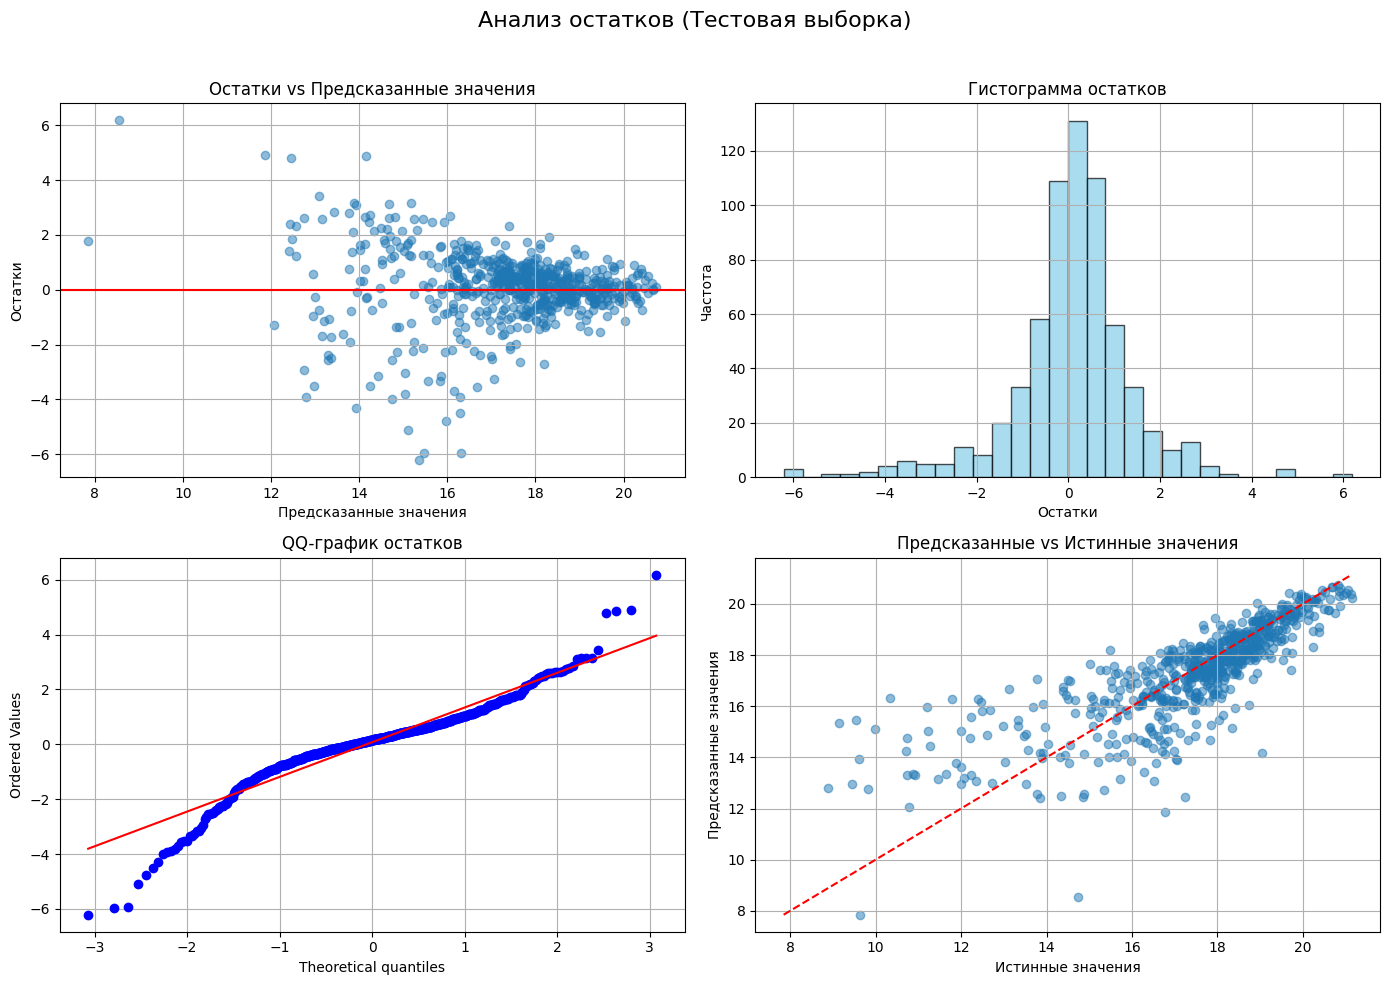

In [217]:
param_grid = {
            'RandomForest': {
                'n_estimators': [100, 200, 300],
                'max_depth': [None, 5, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            },
            'Ridge': {
                'alpha': [0.01, 0.1, 1.0, 10.0],  # Сила регуляризации (L2)
            },
            'ElasticNet': {
                'alpha': [0.01, 0.1, 1.0, 10.0],
            },
            'XGBoost': {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5, 6],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0]
            },
}

cv_results, final_model, best_model_name = cross_validation_with_residuals_hyper(X_train, y_train, X_test, y_test, param_grids=param_grid, models_to_try='all')

### Выводы по модели:
1. MSE = 1.74 (в логарифмической шкале) — это означает, что ошибка составляет примерно в 1.6 раза в исходной шкале (так как exp(√1.74) ≈ 1.6), то есть модель может промахиваться в ±60% от реальной выручки.
2. Есть смещение в область недооценки высоких сборов: модель склонна «осторожничать» и предсказывает ниже, чем фактически бывает для хитов.
3. Eсть смещение в область переоценки низких сборов.
4. **В целом** если модель предсказывает высокую прибыль, то можно считать, что фильмы много заработает. 



In [218]:
print(final_model.score(X_test, y_test))

0.6292203462365592


R² = 0.62 — модель объясняет 62% дисперсии выручки, что довольно хорошо для такой шумной бизнес-метрики, как сборы фильмов.

C:\Users\user\AppData\Local\Temp\ipykernel_19168\3767738900.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='viridis')


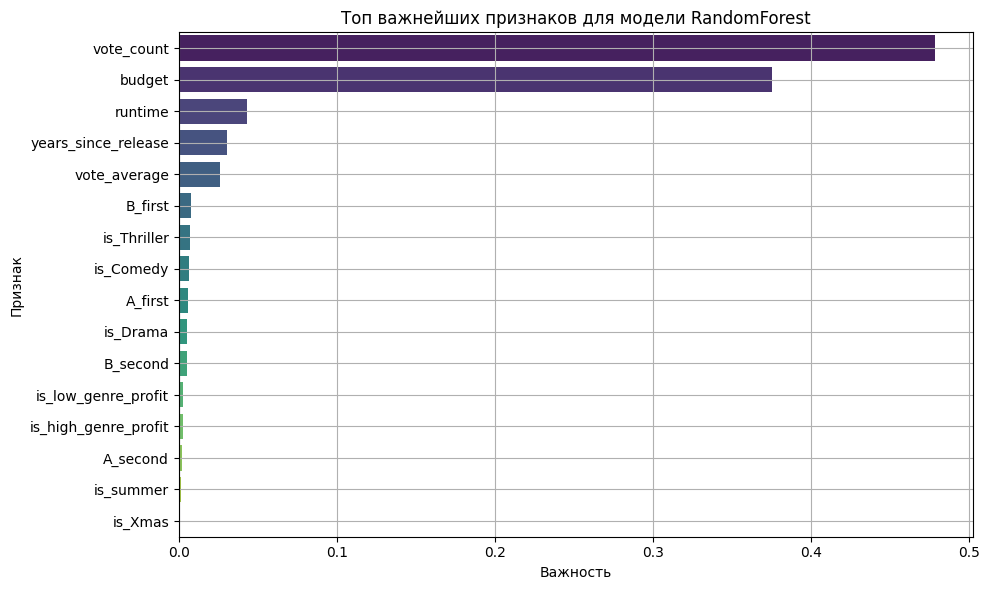

In [151]:
importances = final_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X_columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='viridis')
plt.title('Топ важнейших признаков для модели RandomForest')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.grid(True)
plt.tight_layout()
plt.show()

- Важность `vote_count` говорить, что на сборы влият реклама и вирусность фильмов.
- Второй по значимости фактор `budget`. В него скорее всего входить реклама, популярные актеры,хорошая команда фильма и возможности, которые гарантируют хорошую прибыль.
- `years_since_release` инфляция поднимает сборы фильмов. С каждым годом фильмы будут зарабатывать больше.


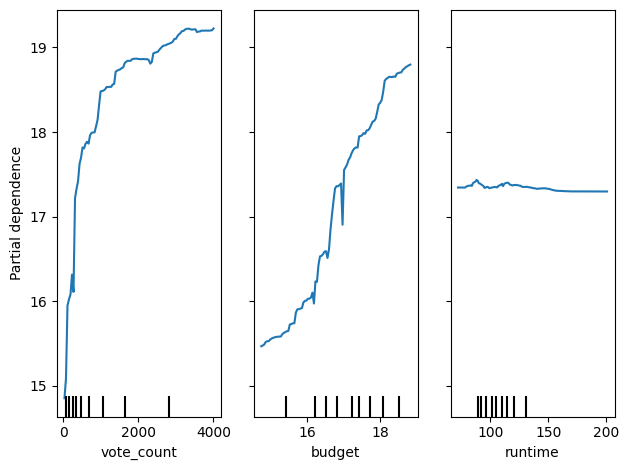

In [224]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features = ['vote_count', 'budget', 'runtime']

# Построение Partial Dependence Plot
PartialDependenceDisplay.from_estimator(final_model, X_test, features, kind='average', grid_resolution=100)

plt.tight_layout()
plt.show()

Графики показывают, что `runtime` не так уж и сильно влияет на выручку.